# Investigation
We will be investigating what variables will have the most impact on a house's market price.  We will be investigating from the perspective of a start up company which buys inexpensive houses and "flips" them for profit.

## Objectives:

* Find what aspects of a house have a significant impact on house's value
* Discover how much a house's value will change based on a changes in condition
* Find the areas that are more profitable to sell homes. 

# Obtaining data
Time to import the necessary libraries and initialize a data frame containing the data from the CSV file.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from scipy.stats import stats
import statsmodels.stats.api as sms

sns.set_style('darkgrid')

## Initializing data frame

In [2]:
df = pd.read_csv('csv_files/kc_house_data.csv')
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB
None


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


# Scrubbing the Data
Now that the data frame has been initialized, we'll start cleaning.

Notes: Problems that I can immediately see are: 
* waterfront, view, and yr_renovated are missing values. 
* sqft_basement and dates are objects instead of integer/float and datetime, respectively. 

## Waterfront

In [3]:
print(df.waterfront.value_counts())
waterfront = df[df['waterfront'] == 1.0]
waterfront['price'].describe()


0.0    19075
1.0      146
Name: waterfront, dtype: int64


count    1.460000e+02
mean     1.717215e+06
std      1.145385e+06
min      2.850000e+05
25%      8.275000e+05
50%      1.510000e+06
75%      2.282500e+06
max      7.060000e+06
Name: price, dtype: float64

In [4]:
# Looked at low end prices of waterfront properties out of curiousity.
# waterfront will play a significant role in price.  Replacing NaN's with 
# median
df.waterfront.fillna(df['waterfront'].median(), inplace=True)
df.waterfront.isna().sum()

0

In [5]:
# making dummies
wtr_dummies = pd.get_dummies(df['waterfront'],prefix='waterfront')
df = pd.concat([df, wtr_dummies], axis=1)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
id                21597 non-null int64
date              21597 non-null object
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_living       21597 non-null int64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
waterfront        21597 non-null float64
view              21534 non-null float64
condition         21597 non-null int64
grade             21597 non-null int64
sqft_above        21597 non-null int64
sqft_basement     21597 non-null object
yr_built          21597 non-null int64
yr_renovated      17755 non-null float64
zipcode           21597 non-null int64
lat               21597 non-null float64
long              21597 non-null float64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
waterfront_0.0    21597 non-null uint8
waterfront_1.0 

In [7]:
#fixing datatypes

for col in df.columns:
    if df[col].dtype == df['waterfront_1.0'].dtype:
        df[col] = df[col].astype(int)
df['waterfront_0.0'].dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
id                21597 non-null int64
date              21597 non-null object
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_living       21597 non-null int64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
waterfront        21597 non-null float64
view              21534 non-null float64
condition         21597 non-null int64
grade             21597 non-null int64
sqft_above        21597 non-null int64
sqft_basement     21597 non-null object
yr_built          21597 non-null int64
yr_renovated      17755 non-null float64
zipcode           21597 non-null int64
lat               21597 non-null float64
long              21597 non-null float64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
waterfront_0.0    21597 non-null int32
waterfront_1.0 

## Yr_renovated

In [8]:
# Checking out yr_renovated  ***Take deeper look into this***
df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [9]:
# Since having data about renovated homes might be useful, filling NaN's with
# median
df.yr_renovated.fillna(df['yr_renovated'].median())

0           0.0
1        1991.0
2           0.0
3           0.0
4           0.0
          ...  
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: yr_renovated, Length: 21597, dtype: float64

### Is It Categorical? 

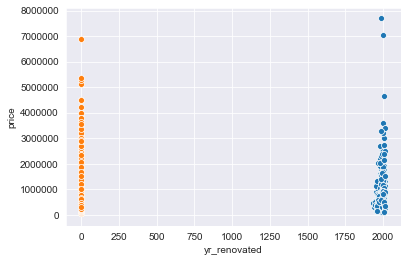

In [10]:
# checking the impact of homes renovated versus not renovated against price

no_reno = df[df['yr_renovated'] == 0]

reno = df[df['yr_renovated'] != 0]

sns.scatterplot(x=reno['yr_renovated'], y=reno['price'])
sns.scatterplot(x=no_reno['yr_renovated'], y=no_reno['price'])

The columns 'yr_renovated' is categorical so we'll alter data frame to represent this.  Renovated homes will be represented by a 1 and non-renovated homes will be represented by a 0. 

In [11]:
for i in range(len(df['yr_renovated'])):
    if df['yr_renovated'].iloc[i] != 0.0:
        df['yr_renovated'].iloc[i] = 1.0
# change name to just renovated
df = df.rename(columns={'yr_renovated' : 'renovated'})

In [12]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_0.0,waterfront_1.0
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1.0,98125,47.7210,-122.319,1690,7639,1,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,1.0,98028,47.7379,-122.233,2720,8062,1,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1,0


In [13]:
rnv_dummies = pd.get_dummies(df['renovated'],prefix='renovated')
df = pd.concat([df, rnv_dummies], axis=1)

# taking care of data types now

for col in df.columns:
    if df[col].dtype == df['renovated_1.0'].dtype:
        df[col] = df[col].astype(int)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
id                21597 non-null int64
date              21597 non-null object
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_living       21597 non-null int64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
waterfront        21597 non-null float64
view              21534 non-null float64
condition         21597 non-null int64
grade             21597 non-null int64
sqft_above        21597 non-null int64
sqft_basement     21597 non-null object
yr_built          21597 non-null int64
renovated         21597 non-null float64
zipcode           21597 non-null int64
lat               21597 non-null float64
long              21597 non-null float64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
waterfront_0.0    21597 non-null int32
waterfront_1.0 

Judging from this graph, and knowing that the number of non-renovated homes far exceeds the number of renovated homes, we'll see whether or not a home has been renovated has an impact. 

## View

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view              63
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
renovated          0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
waterfront_0.0     0
waterfront_1.0     0
renovated_0.0      0
renovated_1.0      0
dtype: int64


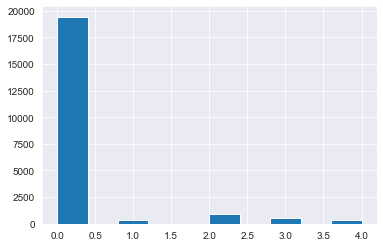

In [14]:
# view column refers to how many times the home has been viewed
print(df.view.value_counts())
print(df.isnull().sum())
df.view.hist()

In [15]:
med_vu = df.view.median()
med_vu

0.0

In [16]:
# Only makes up 0.29% of total data, but the median does not change the 
# create a new category.  Fill with median.
df.fillna(value=med_vu, inplace=True)
df.view.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: view, dtype: float64

In [17]:
# Changing to binary of has been viewed or not
for i in range(len(df['view'])):
    if df['view'].iloc[i] != 0.0:
        df['view'].iloc[i] = 1.0
df.view.value_counts()

0.0    19485
1.0     2112
Name: view, dtype: int64

In [18]:
vu_dummies = pd.get_dummies(df['view'],prefix='view')
vu_dummies

,view_0.0,view_1.0
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
21592,1,0
21593,1,0
21594,1,0
21595,1,0


In [19]:
df = pd.concat([df, vu_dummies], axis=1)


In [20]:
for col in df.columns:
    if df[col].dtype == df['view_1.0'].dtype:
        df[col] = df[col].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 27 columns):
id                21597 non-null int64
date              21597 non-null object
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_living       21597 non-null int64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
waterfront        21597 non-null float64
view              21597 non-null float64
condition         21597 non-null int64
grade             21597 non-null int64
sqft_above        21597 non-null int64
sqft_basement     21597 non-null object
yr_built          21597 non-null int64
renovated         21597 non-null float64
zipcode           21597 non-null int64
lat               21597 non-null float64
long              21597 non-null float64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
waterfront_0.0    21597 non-null int32
waterfront_1.0 

## Date

In [21]:
# Time to deal with object types.
import datetime as dt
df.date.head()

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

In [22]:
# convert 'date' to datetime, then creating 2 new columns so that we can work
# with numerical data
df.date = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day_of_year'] = df['date'].dt.dayofyear


## Sqft_Basement

In [23]:
# inspecting sqft_basement values
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1990.0        1
3000.0        1
1880.0        1
2300.0        1
225.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [24]:
# 452 values of '?'. Makes up 2.1% of our data. 
med_bsmt = df[df['sqft_basement'] != '?']
med = med_bsmt.sqft_basement.median()

for i in range(len(df['sqft_basement'])):
    if df['sqft_basement'].iloc[i] == '?':
        df['sqft_basement'].iloc[i] = str(med)


df.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1990.0        1
906.0         1
1913.0        1
225.0         1
2720.0        1
Name: sqft_basement, Length: 303, dtype: int64

In [25]:
# convert to float
df['sqft_basement'] = df.sqft_basement.astype(float)
df.sqft_basement.dtype

dtype('float64')

### Change to Categorical Format

In [26]:
for i in range(len(df['sqft_basement'])):
    if df['sqft_basement'].iloc[i] != 0.0:
        df['sqft_basement'].iloc[i] = 1.0
        
df = df.rename(columns={'sqft_basement' : 'basement'})
df.basement.head()

0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: basement, dtype: float64

In [27]:
# creating dummies
bsmt_dummies = pd.get_dummies(df['basement'],prefix='bsmt')
bsmt_dummies

,bsmt_0.0,bsmt_1.0
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
21592,1,0
21593,1,0
21594,1,0
21595,1,0


In [28]:
df = pd.concat([df, bsmt_dummies], axis=1)

In [29]:
for col in df.columns:
    if df[col].dtype == df['bsmt_1.0'].dtype:
        df[col] = df[col].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 31 columns):
id                21597 non-null int64
date              21597 non-null datetime64[ns]
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_living       21597 non-null int64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
waterfront        21597 non-null float64
view              21597 non-null float64
condition         21597 non-null int64
grade             21597 non-null int64
sqft_above        21597 non-null int64
basement          21597 non-null float64
yr_built          21597 non-null int64
renovated         21597 non-null float64
zipcode           21597 non-null int64
lat               21597 non-null float64
long              21597 non-null float64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
waterfront_0.0    21597 non-null int32
waterf

## Checking for duplicates

In [30]:
# checking for duplicates
dups = df[df.duplicated(['id'],keep=False)]
dups.groupby('id', axis=1)
dups


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,waterfront_0.0,waterfront_1.0,renovated_0.0,renovated_1.0,view_0.0,view_1.0,month,day_of_year,bsmt_0.0,bsmt_1.0
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,1,0,1,0,1,0,7,206,0,1
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,1,0,1,0,1,0,12,357,0,1
313,4139480200,2014-06-18,1380000.0,4,3.25,4290,12103,1.0,0.0,1.0,...,1,0,1,0,0,1,6,169,0,1
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0.0,1.0,...,1,0,1,0,0,1,12,343,0,1
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0.0,0.0,...,1,0,0,1,1,0,9,248,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,2015-03-30,502000.0,4,2.50,2680,5539,2.0,0.0,0.0,...,1,0,1,0,1,0,3,89,1,0
20763,6300000226,2014-06-26,240000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,1,0,1,0,1,0,6,177,1,0
20764,6300000226,2015-05-04,380000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,1,0,1,0,1,0,5,124,1,0
21564,7853420110,2014-10-03,594866.0,3,3.00,2780,6000,2.0,0.0,0.0,...,1,0,1,0,1,0,10,276,1,0


In [31]:
# duplicates indicate that the houses were sold more than once. Creating 
# subset  of data to see if duplicates were purchased by house flippers
flips = dups[['id', 'date', 'price', 'condition', 'grade']]
flips.head(20)

,id,date,price,condition,grade
93,6021501535,2014-07-25,430000.0,3,8
94,6021501535,2014-12-23,700000.0,3,8
313,4139480200,2014-06-18,1380000.0,3,11
314,4139480200,2014-12-09,1400000.0,3,11
324,7520000520,2014-09-05,232000.0,3,6
325,7520000520,2015-03-11,240500.0,3,6
345,3969300030,2014-07-23,165000.0,3,6
346,3969300030,2014-12-29,239900.0,3,6
371,2231500030,2014-10-01,315000.0,5,7
372,2231500030,2015-03-24,530000.0,5,7


Houses were bought at lower price and sold later at a higher price, but
**grade and condition stayed the same**. Grade and condition of these homes **did not** play a significant role in the sales of these homes. **Homes may not have been flipped**.

In [32]:
# To prevent noise in our data, will remove duplicates and keeping the most
# most recent sale price

df = df.drop_duplicates(subset='id', keep='last')
df.duplicated(['id']).value_counts()

False    21420
dtype: int64

In [33]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'basement', 'yr_built', 'renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'waterfront_0.0',
       'waterfront_1.0', 'renovated_0.0', 'renovated_1.0', 'view_0.0',
       'view_1.0', 'month', 'day_of_year', 'bsmt_0.0', 'bsmt_1.0'],
      dtype='object')

In [37]:
df = df.rename(columns={'waterfront_0.0':'waterfront_N',
                        'waterfront_1.0':'waterfront_Y',
                        'renovated_0.0':'renovated_N',
                        'renovated_1.0':'renovated_Y',
                        'view_0.0':'view_N',
                        'view_1.0':'view_Y',
                        'bsmt_0.0':'bsmt_N',
                        'bsmt_1.0':'bsmt_Y'})

In [38]:
cats = ['waterfront', 'view', 'condition', 'grade','basement','renovated',
       'waterfront_N', 'waterfront_Y','renovated_N', 'renovated_Y', 'view_N', 
        'view_Y', 'month', 'day_of_year', 'bsmt_N', 'bsmt_Y']
for cat in cats:
    df[cat] = df[cat].astype('category')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 31 columns):
id               21420 non-null int64
date             21420 non-null datetime64[ns]
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       21420 non-null category
view             21420 non-null category
condition        21420 non-null category
grade            21420 non-null category
sqft_above       21420 non-null int64
basement         21420 non-null category
yr_built         21420 non-null int64
renovated        21420 non-null category
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
waterfront_N     21420 non-null category
waterfront_Y   

In [40]:
# Cleaning done. Creating new CSV file.
df.reset_index()
df.to_csv('csv_files/kc_house_data_clean.csv')

# Exploring the Data
We've done some investigation of the data already, but that was used more as a 
means to clean the data. Now we'll investigate relationships and check for 
correlations and multicollinearity.

In [41]:
rdf = pd.read_csv('csv_files/kc_house_data_clean.csv')
rdf = rdf.drop(columns='Unnamed: 0', axis=1)
rdf.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,waterfront_N,waterfront_Y,renovated_N,renovated_Y,view_N,view_Y,month,day_of_year,bsmt_N,bsmt_Y
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1,0,1,0,1,0,10,286,1,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1,0,0,1,1,0,12,343,0,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1,0,0,1,1,0,2,56,1,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1,0,1,0,1,0,12,343,0,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1,0,1,0,1,0,2,49,1,0


<Figure size 576x360 with 0 Axes>

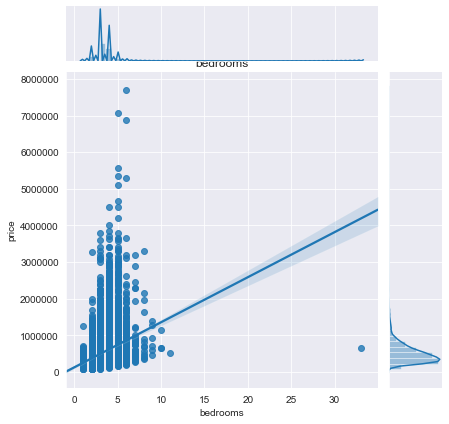

<Figure size 576x360 with 0 Axes>

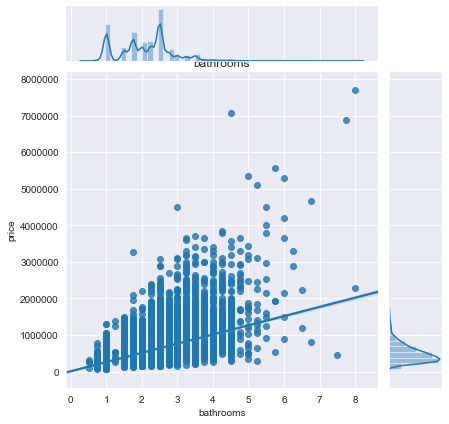

<Figure size 576x360 with 0 Axes>

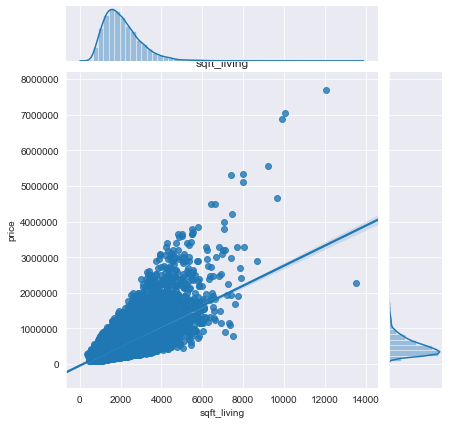

<Figure size 576x360 with 0 Axes>

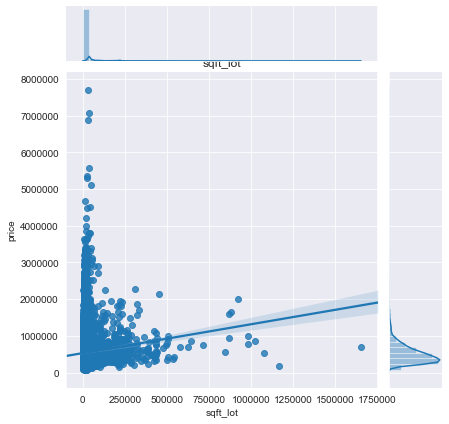

<Figure size 576x360 with 0 Axes>

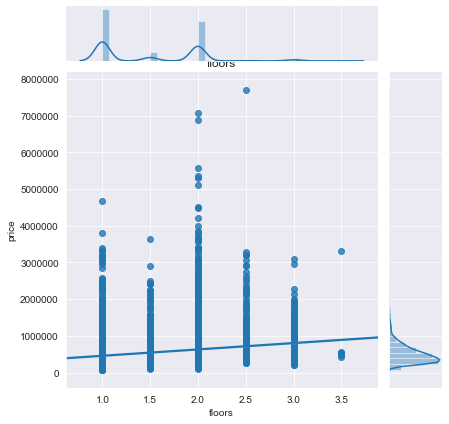

<Figure size 576x360 with 0 Axes>

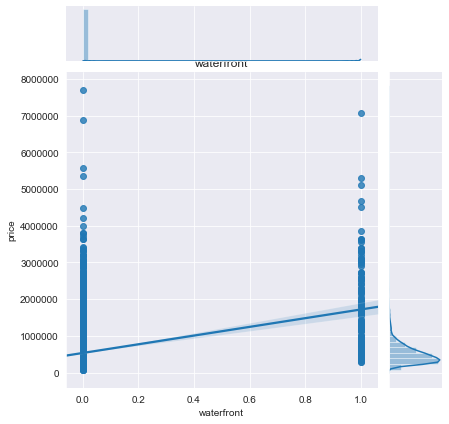

<Figure size 576x360 with 0 Axes>

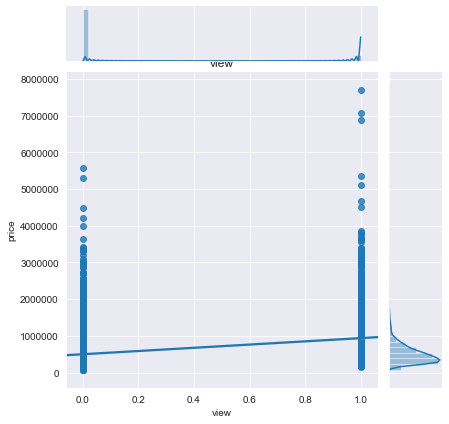

<Figure size 576x360 with 0 Axes>

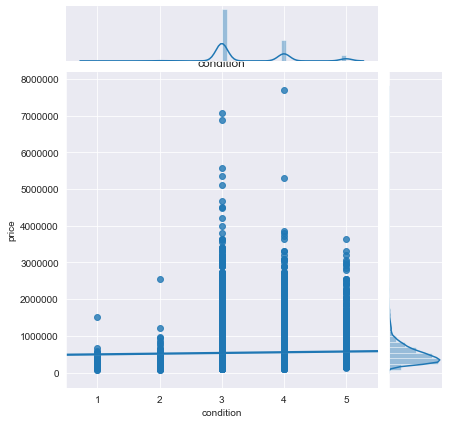

<Figure size 576x360 with 0 Axes>

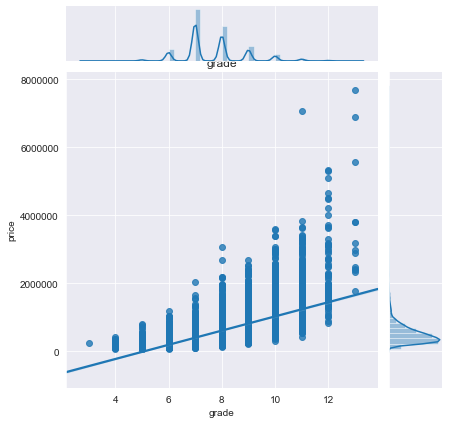

<Figure size 576x360 with 0 Axes>

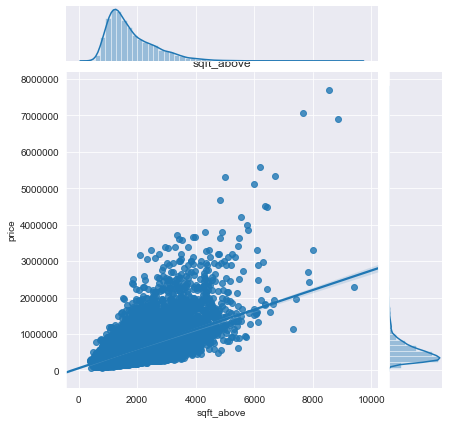

<Figure size 576x360 with 0 Axes>

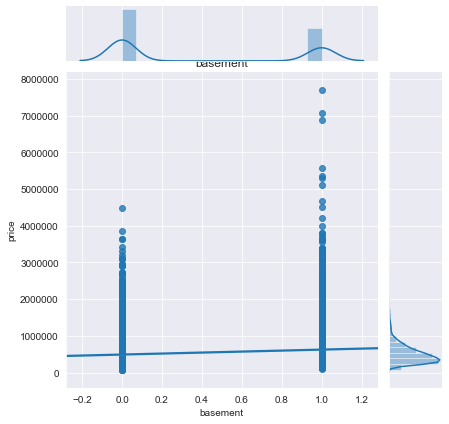

<Figure size 576x360 with 0 Axes>

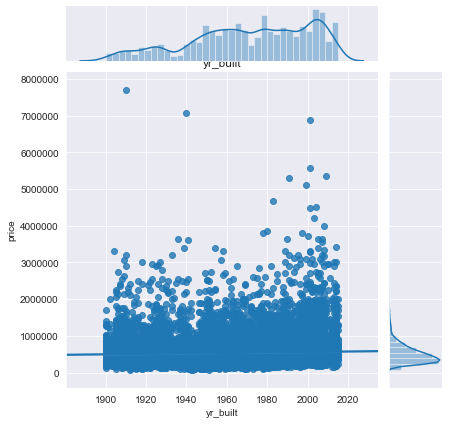

<Figure size 576x360 with 0 Axes>

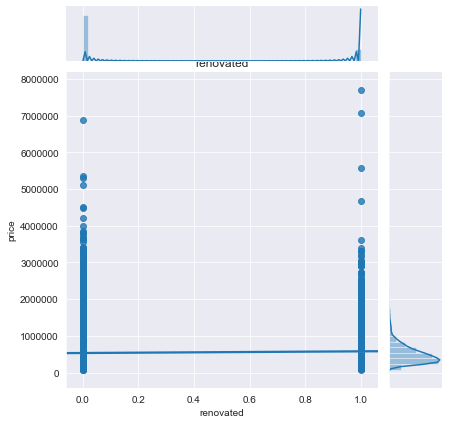

<Figure size 576x360 with 0 Axes>

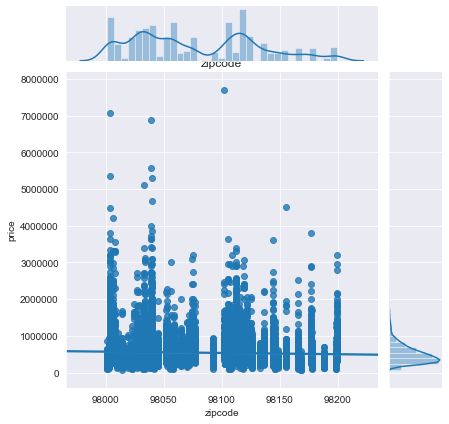

<Figure size 576x360 with 0 Axes>

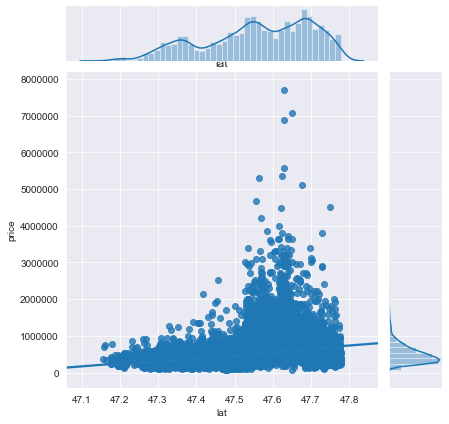

<Figure size 576x360 with 0 Axes>

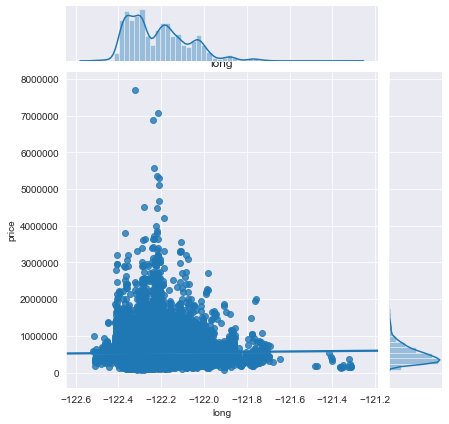

<Figure size 576x360 with 0 Axes>

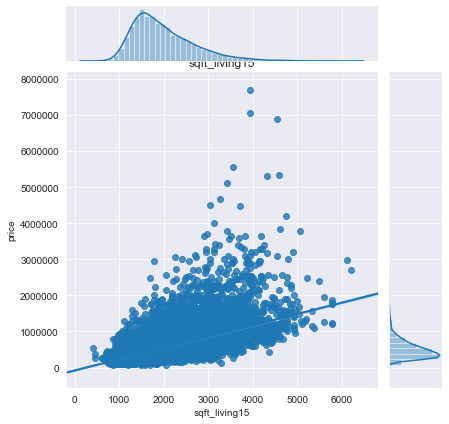

<Figure size 576x360 with 0 Axes>

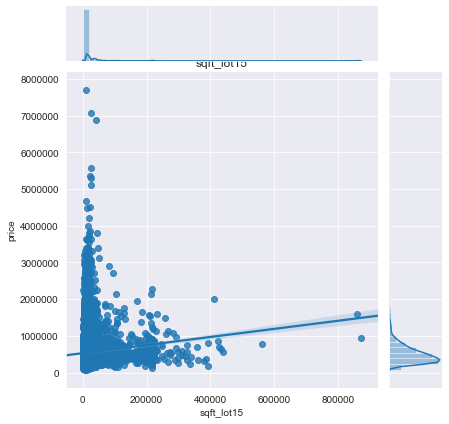

<Figure size 576x360 with 0 Axes>

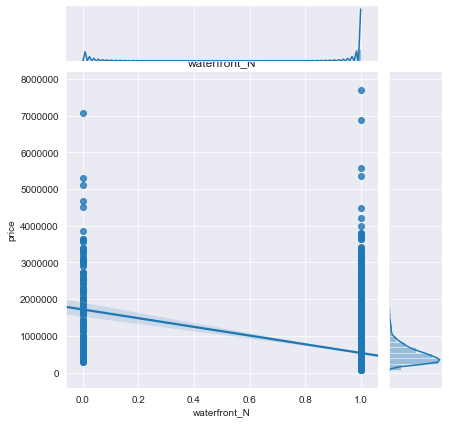

<Figure size 576x360 with 0 Axes>

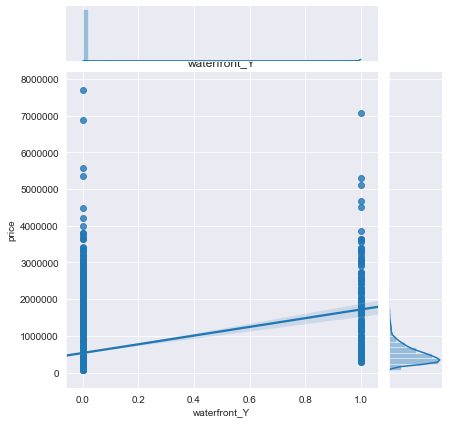

<Figure size 576x360 with 0 Axes>

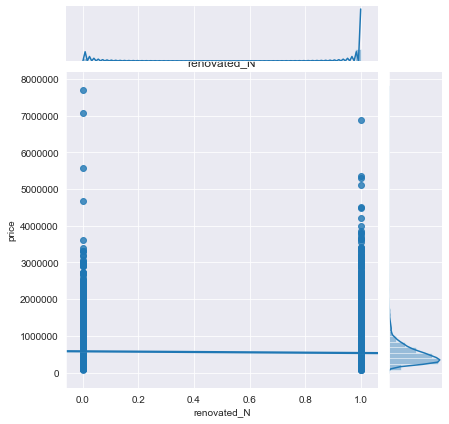

<Figure size 576x360 with 0 Axes>

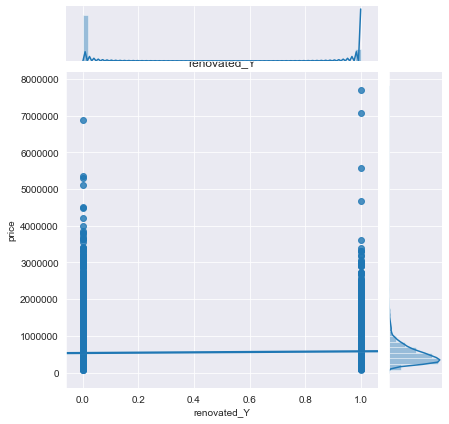

<Figure size 576x360 with 0 Axes>

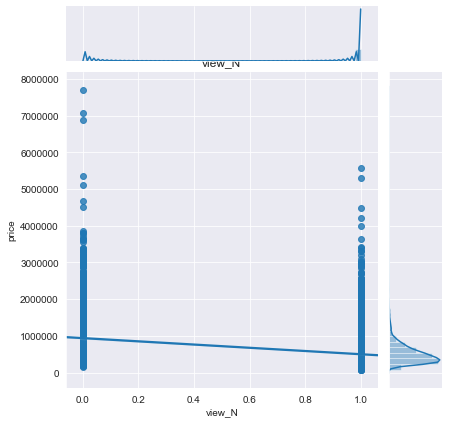

<Figure size 576x360 with 0 Axes>

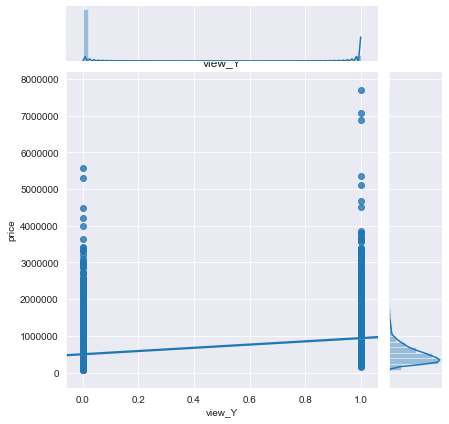

<Figure size 576x360 with 0 Axes>

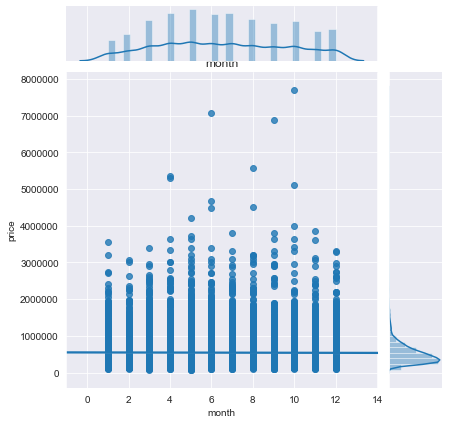

<Figure size 576x360 with 0 Axes>

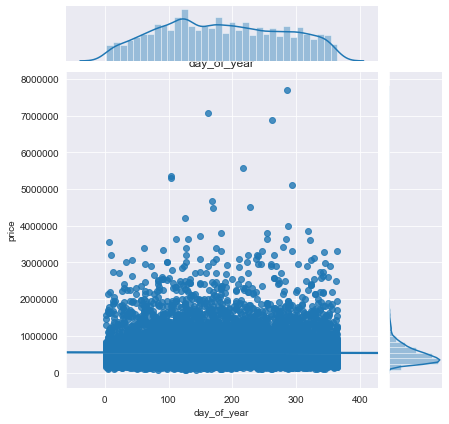

<Figure size 576x360 with 0 Axes>

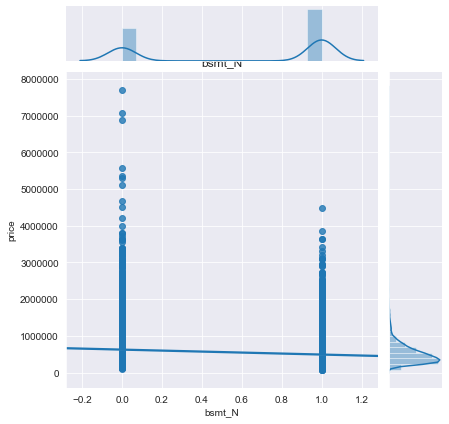

<Figure size 576x360 with 0 Axes>

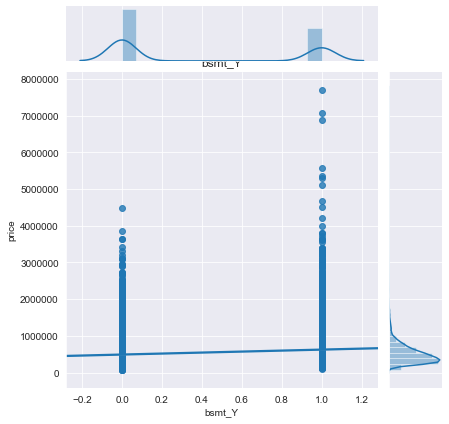

In [42]:
# using for loop to visualize relationship of the different columns to 'price'
no_date = rdf.drop(['date', 'id', 'price'], axis=1)

for col in no_date.columns:
    plt.figure(figsize=(8,5))
    sns.jointplot(x= col, y= 'price', data=rdf, kind='reg')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('price')
    plt.show()

Observations: Price is pretty normally distributed.

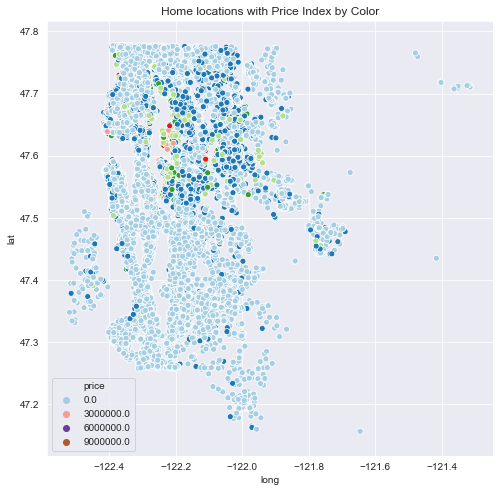

In [43]:
long = rdf['long']
lat = rdf['lat']
plt.figure(figsize=(8,8))
sns.scatterplot(x=long, y=lat, hue='price', data=rdf, palette='Paired')
plt.title('Home locations with Price Index by Color')
plt.legend(fancybox=True)

In [44]:
print(long.describe())
print(lat.describe())

count    21420.000000
mean      -122.213784
std          0.140791
min       -122.519000
25%       -122.328000
50%       -122.230000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64
count    21420.000000
mean        47.560197
std          0.138589
min         47.155900
25%         47.471200
50%         47.572100
75%         47.678100
max         47.777600
Name: lat, dtype: float64


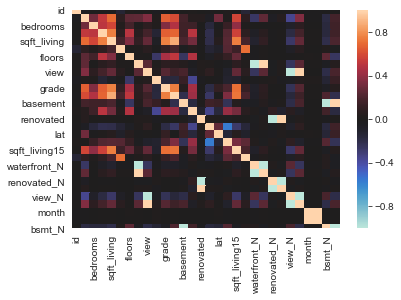

In [45]:
# generating heatmap
sns.heatmap(rdf.corr(), center=0);

In [46]:
# creating a date frame that only contains the pairs of values with highest 
# correlation

# converts all elements to absolute values, stacks into multi-index, resets 
# the index to set the multi-index to seperate columns, and finally sorts them
corr_pairs = rdf.corr().abs().stack().reset_index().sort_values(0, 
                                                                ascending=False)
# zipping the variable name columns
corr_pairs['pairs'] = list(zip(corr_pairs.level_0, corr_pairs.level_1))

#set index to the pairs
pairs_index = corr_pairs.set_index(['pairs'])

#dropping level columns
pairs = pairs_index.drop(columns=['level_0', 'level_1'])

#renaming column for comprehension
pairs.columns = ['correlation']
#Since our heatmap shows that our variables only show perfect correlation with 
#themselves, we'll drop duplicates
unique_pairs = pairs.drop_duplicates()

In [47]:
unique_pairs[(unique_pairs.correlation>0.75) & (unique_pairs.correlation<1)]

,correlation
pairs,
"(month, day_of_year)",0.995842
"(sqft_living, sqft_above)",0.876533
"(sqft_living, grade)",0.762477
"(grade, sqft_above)",0.756221
"(sqft_living, sqft_living15)",0.756186
"(bathrooms, sqft_living)",0.755522


In [48]:
# due to high correlaton of day of the year and  sqft_above, we'll drop these
# columns 

rdf.drop(columns=['sqft_above', 'day_of_year'], inplace=True)


### Initial Observations: 
   * Grade has a linear rather linear relationship to price. May break these up into bins to consolidate dummy variables 
   * Square foot above ground seems to also have a somewhat linear relationship
   * Distributions of longitude and latitude seem to point at areas that have higher land value. 
   * Lot size of the home or nearest neighbors seems to have little effect on price
   * Need to deal with sizes of categorical data.
   * Need to deal with the outliers in continuous variables
   * Is the number of bedrooms actually categorical?
   * High correlation between sqft_above and sqft_living  

## Baseline Model

In [49]:
target = 'price'

feats = rdf.drop(['price', 'date', 'id'], axis=1).columns

preds = '+'.join(feats)

formula = target + '~' + preds
model = smf.ols(formula=formula, data=rdf).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS                  Adj. R-squared:         0.698      
Dependent Variable:     price                AIC:                    584163.1989
Date:                   2020-07-17 14:57     BIC:                    584314.6684
No. Observations:       21420                Log-Likelihood:         -2.9206e+05
Df Model:               18                   F-statistic:            2747.      
Df Residuals:           21401                Prob (F-statistic):     0.00       
R-squared:              0.698                Scale:                  4.0847e+10 
--------------------------------------------------------------------------------
                 Coef.       Std.Err.     t     P>|t|     [0.025       0.975]   
--------------------------------------------------------------------------------
Intercept     1898799.2242 809344.7151   2.3461 0.0190  312423.0118 3485175.4365
bedrooms       -36947.5511   1918.9163 -19.2544 0.0000  -40708.7706  -33186.3316
bathrooms       44251.9737   3293.2856  13.4370 0.0000   37796.8874   50707.0600
sqft_living       174.4329      3.4242  50.9411 0.0000     167.7212     181.1446
sqft_lot            0.1349      0.0481   2.8034 0.0051       0.0406       0.2293
floors          12018.6454   3483.1671   3.4505 0.0006    5191.3773   18845.9136
waterfront     867237.4346 269897.0115   3.2132 0.0013  338219.0931 1396255.7761
view           670652.2741 269986.0176   2.4840 0.0130  141459.4741 1199845.0741
condition       24565.0159   2342.7480  10.4856 0.0000   19973.0543   29156.9774
grade           99492.1491   2157.8354  46.1074 0.0000   95262.6301  103721.6680
basement       626687.7947 269976.3932   2.3213 0.0203   97513.8593 1155861.7301
yr_built        -2774.6276     70.0212 -39.6255 0.0000   -2911.8744   -2637.3807
renovated      635869.7303 269759.8596   2.3572 0.0184  107120.2169 1164619.2437
zipcode          -575.1745     33.3155 -17.2645 0.0000    -640.4755    -509.8736
lat            596129.6211  10810.4758  55.1437 0.0000  574940.2795  617318.9627
long          -213946.5090  13273.7159 -16.1181 0.0000 -239963.9856 -187929.0324
sqft_living15      22.9230      3.4542   6.6363 0.0000      16.1526      29.6935
sqft_lot15         -0.3764      0.0737  -5.1057 0.0000      -0.5209      -0.2319
waterfront_N  1031561.7895 539541.2246   1.9119 0.0559  -25979.3895 2089102.9686
waterfront_Y   867237.4346 269897.0115   3.2132 0.0013  338219.0931 1396255.7761
renovated_N   1262929.4939 539588.4527   2.3405 0.0193  205295.7442 2320563.2436
renovated_Y    635869.7303 269759.8596   2.3572 0.0184  107120.2169 1164619.2437
view_N        1228146.9500 539366.9326   2.2770 0.0228  170947.3963 2285346.5038
view_Y         670652.2741 269986.0176   2.4840 0.0130  141459.4741 1199845.0741
month           -3043.2162    443.3723  -6.8638 0.0000   -3912.2591   -2174.1734
bsmt_N        1272111.4295 539371.7668   2.3585 0.0184  214902.4003 2329320.4586
bsmt_Y         626687.7947 269976.3932   2.3213 0.0203   97513.8593 1155861.7301
--------------------------------------------------------------------------------
Omnibus:              18261.722       Durbin-Watson:          1.993             
Prob(Omnibus):        0.000           Jarque-Bera (JB):       1845783.037       
Skew:                 3.582           Prob(JB):               0.000             
Kurtosis:             47.909          Condition No.:          277523646674155072
================================================================================
* The condition number is large (3e+17). This might indicate             strong
multicollinearity or other numerical problems.
"""

 Kurtosis is extremely high.  High standard error. Have not made dummies or finished binning the
 categorical data, but this is a good start.

### Formating Additional Categorical Data
It's time to address the categorical data that we haven't yet formatted
into friendlier sizes so that our model 

#### Zip Codes

In [50]:
zips = len(rdf['zipcode'].unique())
zips

70

In [51]:
# 70 different zipcodes. Need to group these preferably into 6 sectors
df_test = rdf.copy()

In [52]:
df_test.loc[(df_test['lat'] > 47.5) & (df_test['long'] < -121.9), 
            "quad_1"] = 1

In [53]:
df_test.quad_1.value_counts()

1.0    14480
Name: quad_1, dtype: int64

In [54]:

df_test.loc[(df_test['lat'] >= 47.5) & (df_test['long'] >= -121.9), 
            "quad_2"] = 1
df_test.loc[(df_test['lat'] < 47.5) & (df_test['long'] < -121.9), 
            "quad_3"] = 1
df_test.loc[(df_test['lat'] < 47.5) & (df_test['long'] > -121.9), 
            "quad_4"] = 1

In [55]:
df_test = df_test.fillna(value=0)
print(df_test.shape)
df_test.head()

(21420, 33)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,renovated_Y,view_N,view_Y,month,bsmt_N,bsmt_Y,quad_1,quad_2,quad_3,quad_4
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0,1,0,10,1,0,1.0,0.0,0.0,0.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1,1,0,12,0,1,1.0,0.0,0.0,0.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1,1,0,2,1,0,1.0,0.0,0.0,0.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0,1,0,12,0,1,1.0,0.0,0.0,0.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0,1,0,2,1,0,1.0,0.0,0.0,0.0


In [56]:
# Apply to rdf
rdf.loc[(rdf['lat'] > 47.5) & (df_test['long'] < -121.9), 
            "quad_1"] = 1
rdf.loc[(rdf['lat'] >= 47.5) & (df_test['long'] >= -121.9), 
            "quad_2"] = 1
rdf.loc[(rdf['lat'] < 47.5) & (df_test['long'] < -121.9), 
            "quad_3"] = 1
rdf.loc[(rdf['lat'] < 47.5) & (df_test['long'] > -121.9), 
            "quad_4"] = 1

In [57]:
rdf = rdf.fillna(value=0)
print(rdf.shape)
rdf.head()

(21420, 33)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,renovated_Y,view_N,view_Y,month,bsmt_N,bsmt_Y,quad_1,quad_2,quad_3,quad_4
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0,1,0,10,1,0,1.0,0.0,0.0,0.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1,1,0,12,0,1,1.0,0.0,0.0,0.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1,1,0,2,1,0,1.0,0.0,0.0,0.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0,1,0,12,0,1,1.0,0.0,0.0,0.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0,1,0,2,1,0,1.0,0.0,0.0,0.0


In [58]:
# Now we can drop the zipcode column
rdf1 = rdf.drop(columns=['zipcode'])

#### Grade

In [59]:
rdf1['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

Unique values are 3-13.  If we bin by every 3 numbers, we'll lose value 13 Creating bins are based on odd numbers, we'll be able to account for all of
the values

Text(0, 0.5, 'value counts')

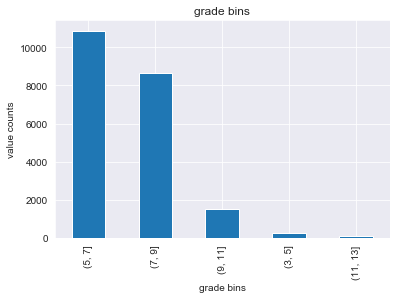

In [60]:
bins = [3, 5, 7, 9, 11, 13]
bin_grd = pd.cut(rdf1['grade'], bins)
bin_grd = bin_grd.cat.as_ordered()

bin_grd.value_counts().plot(kind='bar')
plt.title('grade bins')
plt.xlabel('grade bins')
plt.ylabel('value counts')

In [61]:
# now to afix this to our data frame and create dummies
rdf1['grade'] = bin_grd
rdf1['grade'] = rdf1['grade'].cat.codes
# Creating dummies
gbin_dummies = pd.get_dummies(bin_grd, prefix='grade') #keeping first column 
                                                # so future names make sense

adf = rdf.drop(['id', 'grade'], axis=1)
adf = pd.concat([rdf, gbin_dummies], axis=1)
adf.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,bsmt_Y,quad_1,quad_2,quad_3,quad_4,"grade_(3, 5]","grade_(5, 7]","grade_(7, 9]","grade_(9, 11]","grade_(11, 13]"
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0,1.0,0.0,0.0,0.0,0,1,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1,1.0,0.0,0.0,0.0,0,1,0,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,1.0,0.0,0.0,0.0,0,1,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1,1.0,0.0,0.0,0.0,0,1,0,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0,1.0,0.0,0.0,0.0,0,0,1,0,0


Those names are annoying, so we'll rename and simplify them for easier reference

In [62]:
adf1 = adf.rename(columns={'grade_(3, 5]':'grd_F', 'grade_(5, 7]':'grd_D', 
                           'grade_(7, 9]':'grd_C', 'grade_(9, 11]':'grd_B', 
                           'grade_(11, 13]':'grd_A'})
adf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 38 columns):
id               21420 non-null int64
date             21420 non-null object
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       21420 non-null float64
view             21420 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
basement         21420 non-null float64
yr_built         21420 non-null int64
renovated        21420 non-null float64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
waterfront_N     21420 non-null int64
waterfront_Y     21420 non-null int64
renovated_N      21420 non-null int6

In [63]:
# Fixing Dummy Types
for col in adf1.columns:
    if adf1[col].dtype == adf1['grd_A'].dtype:
        adf1[col] = adf1[col].astype(int)
adf1['grd_B'].dtype
    

dtype('int32')

In [64]:
# Let's just drop 'grade' and 'date' now

adf1.drop(['grade', 'date'], axis=1, inplace=True)

In [65]:
target = 'price'

feats = adf1.drop(['price', 'id', 'grd_F'], axis=1).columns

preds = '+'.join(feats)

formula1 = target + '~' + preds
model1 = smf.ols(formula=formula1, data=adf1).fit()
model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS                  Adj. R-squared:         0.724      
Dependent Variable:     price                AIC:                    582233.6395
Date:                   2020-07-17 14:59     BIC:                    582440.9136
No. Observations:       21420                Log-Likelihood:         -2.9109e+05
Df Model:               25                   F-statistic:            2246.      
Df Residuals:           21394                Prob (F-statistic):     0.00       
R-squared:              0.724                Scale:                  3.7316e+10 
--------------------------------------------------------------------------------
                 Coef.       Std.Err.     t     P>|t|     [0.025       0.975]   
--------------------------------------------------------------------------------
Intercept     3867138.1293 785884.6220   4.9207 0.0000 2326745.4265 5407530.8321
bedrooms       -25069.4268   1862.2752 -13.4617 0.0000  -28719.6258  -21419.2279
bathrooms       44703.5909   3151.1333  14.1865 0.0000   38527.1336   50880.0481
sqft_living       169.9299      3.2822  51.7736 0.0000     163.4966     176.3632
sqft_lot            0.1588      0.0461   3.4471 0.0006       0.0685       0.2490
floors          17596.1512   3397.8782   5.1786 0.0000   10936.0555   24256.2469
waterfront    1515727.0748 262082.9753   5.7834 0.0000 1002024.8195 2029429.3301
view          1324196.4446 262158.1543   5.0511 0.0000  810346.8328 1838046.0563
condition       31122.8196   2244.7688  13.8646 0.0000   26722.9047   35522.7345
basement      1282701.4213 262135.7357   4.8933 0.0000  768895.7518 1796507.0909
yr_built        -1822.3549     67.7181 -26.9109 0.0000   -1955.0873   -1689.6224
renovated     1293731.2300 261941.6344   4.9390 0.0000  780306.0136 1807156.4464
zipcode          -544.5514     32.8177 -16.5932 0.0000    -608.8764    -480.2263
lat            170036.3759  18086.1173   9.4015 0.0000  134586.2319  205486.5200
long          -285454.9130  15011.1662 -19.0162 0.0000 -314877.9228 -256031.9032
sqft_living15      43.9227      3.2845  13.3728 0.0000      37.4849      50.3606
sqft_lot15         -0.2935      0.0705  -4.1618 0.0000      -0.4318      -0.1553
waterfront_N  2351411.0541 523889.9227   4.4884 0.0000 1324547.5791 3378274.5290
waterfront_Y  1515727.0753 262082.9754   5.7834 0.0000 1002024.8198 2029429.3307
renovated_N   2573406.8994 523946.3755   4.9116 0.0000 1546432.7727 3600381.0261
renovated_Y   1293731.2299 261941.6344   4.9390 0.0000  780306.0135 1807156.4463
view_N        2542941.6856 523734.2974   4.8554 0.0000 1516383.2477 3569500.1234
view_Y        1324196.4438 262158.1542   5.0511 0.0000  810346.8323 1838046.0552
month           -2888.1748    423.8635  -6.8139 0.0000   -3718.9789   -2057.3706
bsmt_N        2584436.7080 523752.2452   4.9345 0.0000 1557843.0912 3611030.3248
bsmt_Y        1282701.4213 262135.7357   4.8933 0.0000  768895.7518 1796507.0908
quad_1          59561.8701  96728.6806   0.6158 0.5381 -130033.5865  249157.3266
quad_2          25430.3146  97228.4846   0.2616 0.7937 -165144.7953  216005.4245
quad_3        -116710.4510  96708.8613  -1.2068 0.2275 -306267.0604   72846.1583
quad_4          71134.2134  97724.8961   0.7279 0.4667 -120413.9001  262682.3269
grd_D           19703.0455  12341.9935   1.5964 0.1104   -4488.1858   43894.2769
grd_C           77039.9165  12917.5713   5.9640 0.0000   51720.5095  102359.3235
grd_B          312274.6433  14802.6421  21.0959 0.0000  283260.3565  341288.9301
grd_A         1033498.0739  25342.1291  40.7818 0.0000  983825.6034 1083170.5444
--------------------------------------------------------------------------------
Omnibus:               16101.284       Durbin-Watson:          1.990            
Prob(Omnibus):         0.000           Jarque-Bera (JB):       1231418.793      
Skew:  

Observations: R2 went up a touch, kurtosis dropped significantly. 
Dummy Variables have a very positive effect on price if we drop homes with an F grade.

Try new model

In [66]:
# This time we're dropping 'grd_A'
target = 'price'

feats = adf1.drop(['price', 'id', 'grd_A'], axis=1).columns

preds = '+'.join(feats)

formula1 = target + '~' + preds
model1 = smf.ols(formula=formula1, data=adf1).fit()
model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                    OLS                  Adj. R-squared:         0.724      
Dependent Variable:       price                AIC:                    582252.9006
Date:                     2020-07-17 14:59     BIC:                    582460.1747
No. Observations:         21420                Log-Likelihood:         -2.9110e+05
Df Model:                 25                   F-statistic:            2243.      
Df Residuals:             21394                Prob (F-statistic):     0.00       
R-squared:                0.724                Scale:                  3.7349e+10 
----------------------------------------------------------------------------------
                  Coef.       Std.Err.     t     P>|t|      [0.025       0.975]   
----------------------------------------------------------------------------------
Intercept      4078202.6279 786507.1806   5.1852 0.0000  2536589.6638 5619815.5920
bedrooms        -25070.6017   1863.2316 -13.4554 0.0000   -28722.6751  -21418.5283
bathrooms        44751.4024   3152.5318  14.1954 0.0000    38572.2040   50930.6008
sqft_living        170.4475      3.2816  51.9400 0.0000      164.0152     176.8797
sqft_lot             0.1595      0.0461   3.4624 0.0005        0.0692       0.2498
floors           17484.3014   3399.3855   5.1434 0.0000    10821.2512   24147.3516
waterfront     1586203.3033 262289.6436   6.0475 0.0000  1072095.9626 2100310.6439
view           1394575.6603 262365.5894   5.3154 0.0000   880319.4604 1908831.8602
condition        30948.0210   2245.7818  13.7805 0.0000    26546.1206   35349.9214
basement       1352991.0608 262343.7092   5.1573 0.0000   838777.7476 1867204.3739
yr_built         -1816.3544     67.7385 -26.8142 0.0000    -1949.1270   -1683.5817
renovated      1364106.2385 262149.1937   5.2035 0.0000   850274.1903 1877938.2868
zipcode           -545.1063     32.8324 -16.6027 0.0000     -609.4602    -480.7523
lat             171192.0994  18095.0120   9.4607 0.0000   135724.5209  206659.6779
long           -287384.9317  15014.6862 -19.1403 0.0000  -316814.8408 -257955.0226
sqft_living15       44.0671      3.2858  13.4113 0.0000       37.6266      50.5075
sqft_lot15          -0.2931      0.0706  -4.1543 0.0000       -0.4314      -0.1548
waterfront_N   2491999.3239 524305.8210   4.7529 0.0000  1464320.6570 3519677.9908
waterfront_Y   1586203.3041 262289.6438   6.0475 0.0000  1072095.9632 2100310.6451
renovated_N    2714096.3883 524361.3748   5.1760 0.0000  1686308.8319 3741883.9448
renovated_Y    1364106.2397 262149.1939   5.2035 0.0000   850274.1910 1877938.2884
view_N         2683626.9661 524149.4214   5.1200 0.0000  1656254.8541 3710999.0780
view_Y         1394575.6619 262365.5897   5.3154 0.0000   880319.4614 1908831.8625
month            -2867.9184    424.0590  -6.7630 0.0000    -3699.1058   -2036.7311
bsmt_N         2725211.5673 524166.8297   5.1991 0.0000  1697805.3338 3752617.8008
bsmt_Y         1352991.0607 262343.7092   5.1573 0.0000   838777.7476 1867204.3739
quad_1           59308.4580  96772.3867   0.6129 0.5400  -130372.6658  248989.5819
quad_2           25486.3146  97272.2445   0.2620 0.7933  -165174.5680  216147.1972
quad_3         -116983.3511  96752.4782  -1.2091 0.2266  -306625.4529   72658.7506
quad_4           71731.7275  97768.7581   0.7337 0.4631  -119902.3588  263365.8138
grd_F         -1022299.6942  25225.1899 -40.5269 0.0000 -1071742.9552 -972856.4332
grd_D         -1002535.8637  21614.8485 -46.3818 0.0000 -1044902.5852 -960169.1423
grd_C          -945808.7430  20852.3814 -45.3573 0.0000  -986680.9719 -904936.5142
grd_B          -711472.3172  20348.2992 -34.9647 0.0000  -751356.5072 -671588.1271
----------------------------------------------------------------------------------
Omnibus:               16107.744        Durbin-Watson:           1.990      

When you drop grade A homes (which were mostly outliers, similar to F grade homes) the effect is much more negative across the board for the dummy variables.

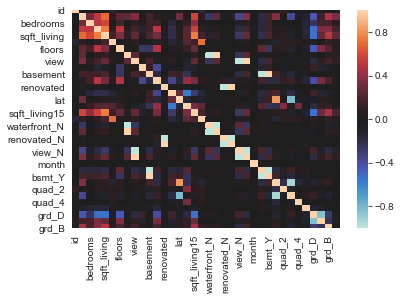

In [67]:
# Checking for correlation with the new dummy columns
sns.heatmap(data=adf1.corr(), center=0)

In [68]:
# Rechecking correlated values
corr_pairs = adf1.corr().abs().stack().reset_index().sort_values(0,
                                                            ascending=False)
corr_pairs['pairs'] = list(zip(corr_pairs.level_0, corr_pairs.level_1))

pairs_index = corr_pairs.set_index(['pairs'])

pairs = pairs_index.drop(columns=['level_0', 'level_1'])

pairs.columns = ['correlation']
#heatmap still shows that our variables only have perfect correlation with 
#themselves, we'll drop duplicates
unique_pairs = pairs.drop_duplicates()

In [69]:
unique_pairs[(unique_pairs.correlation>0.75) & (unique_pairs.correlation<1)]

,correlation
pairs,
"(quad_1, quad_3)",0.934385
"(grd_D, grd_C)",0.836263
"(quad_3, lat)",0.826516
"(quad_1, lat)",0.821455
"(sqft_living, sqft_living15)",0.756186
"(sqft_living, bathrooms)",0.755522


<Figure size 576x360 with 0 Axes>

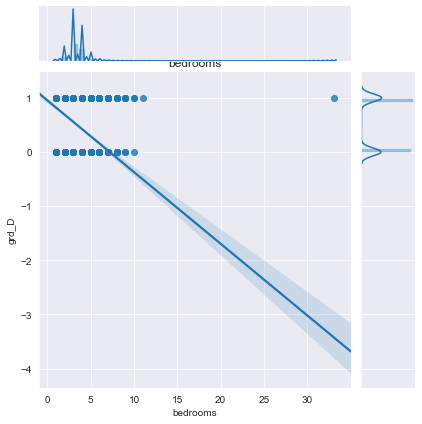

<Figure size 576x360 with 0 Axes>

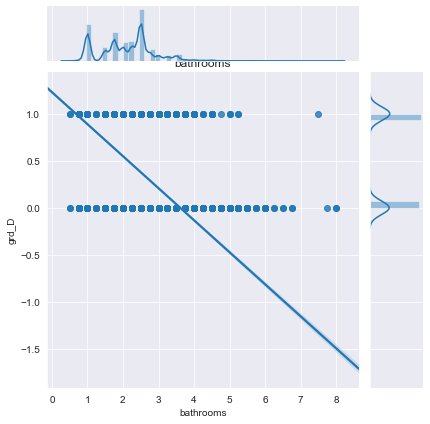

<Figure size 576x360 with 0 Axes>

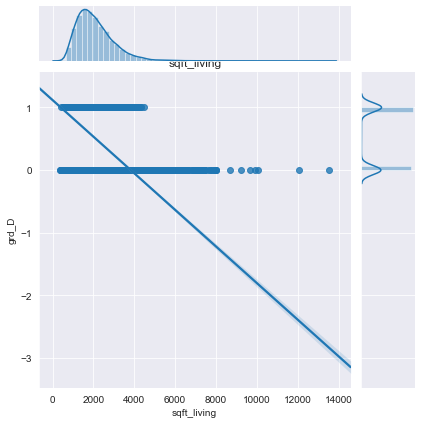

<Figure size 576x360 with 0 Axes>

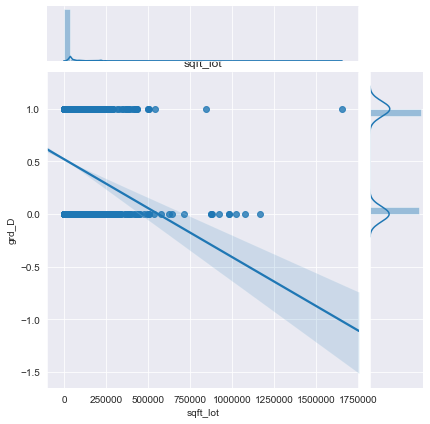

<Figure size 576x360 with 0 Axes>

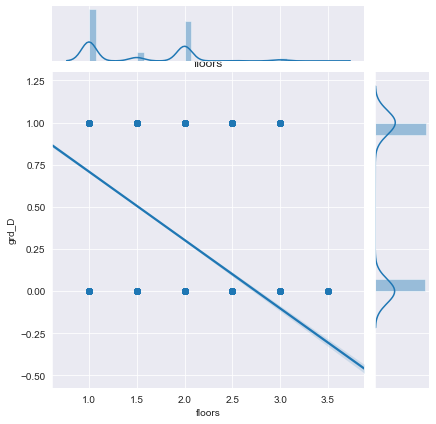

<Figure size 576x360 with 0 Axes>

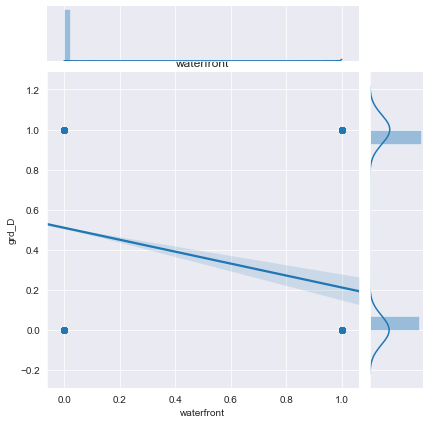

<Figure size 576x360 with 0 Axes>

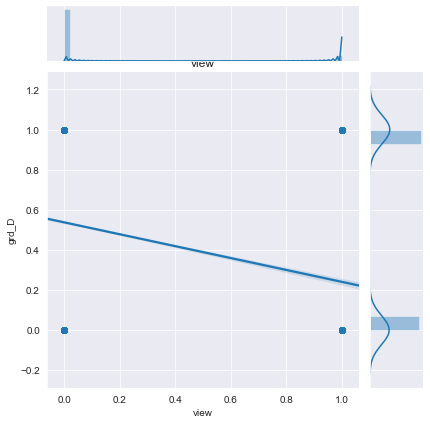

<Figure size 576x360 with 0 Axes>

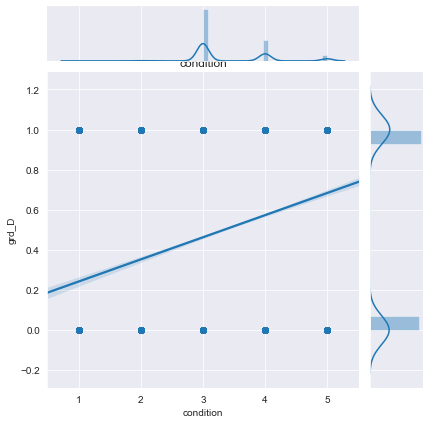

<Figure size 576x360 with 0 Axes>

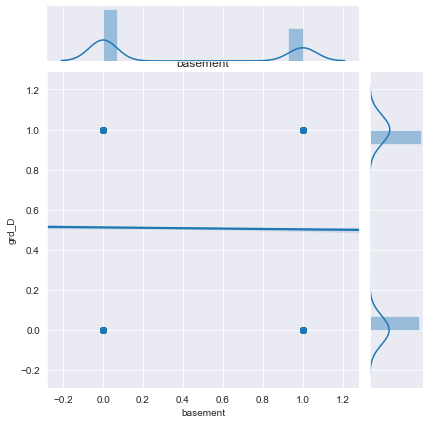

<Figure size 576x360 with 0 Axes>

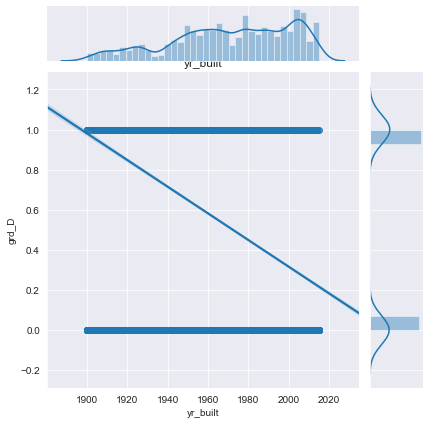

<Figure size 576x360 with 0 Axes>

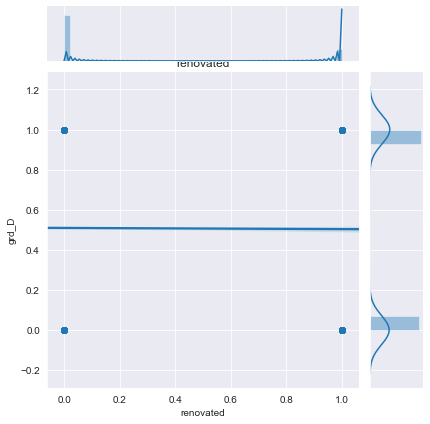

<Figure size 576x360 with 0 Axes>

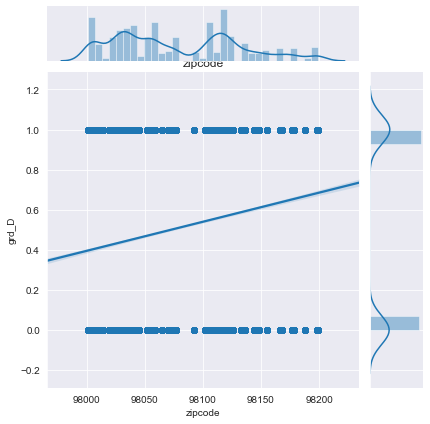

<Figure size 576x360 with 0 Axes>

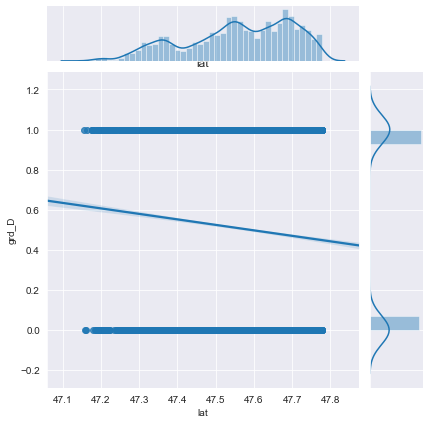

<Figure size 576x360 with 0 Axes>

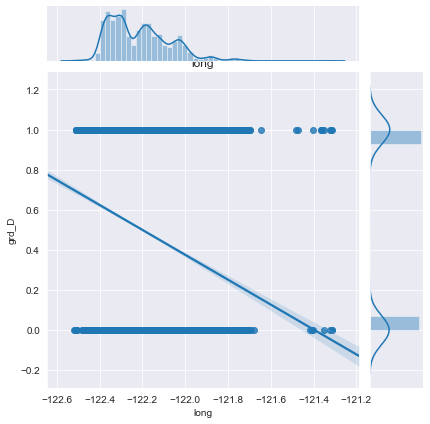

<Figure size 576x360 with 0 Axes>

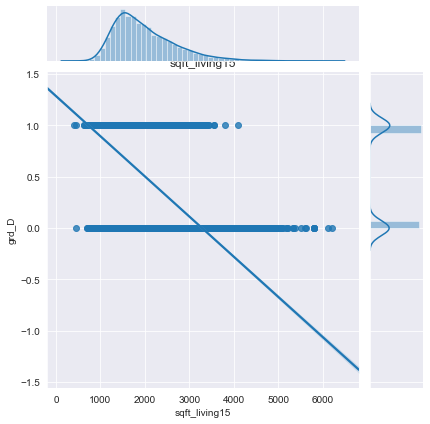

<Figure size 576x360 with 0 Axes>

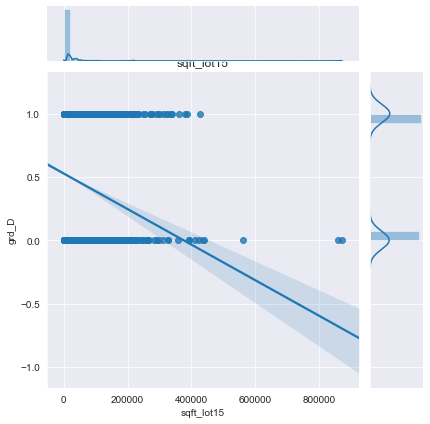

<Figure size 576x360 with 0 Axes>

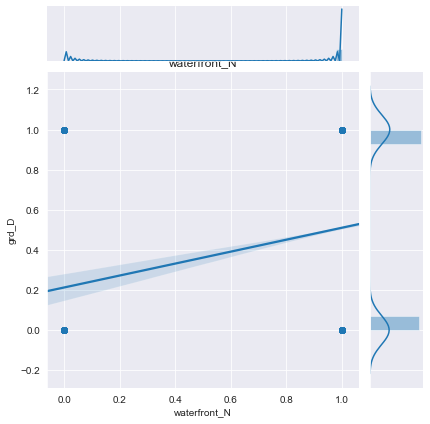

<Figure size 576x360 with 0 Axes>

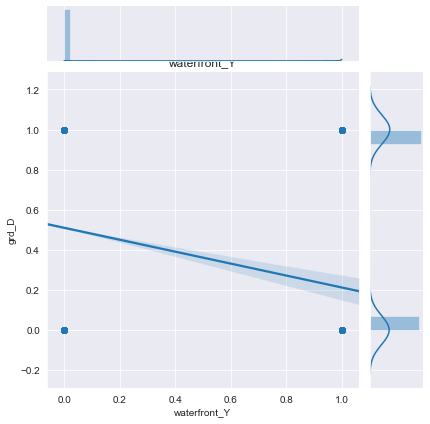

<Figure size 576x360 with 0 Axes>

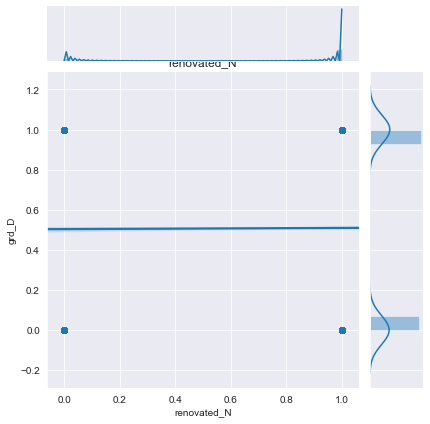

<Figure size 576x360 with 0 Axes>

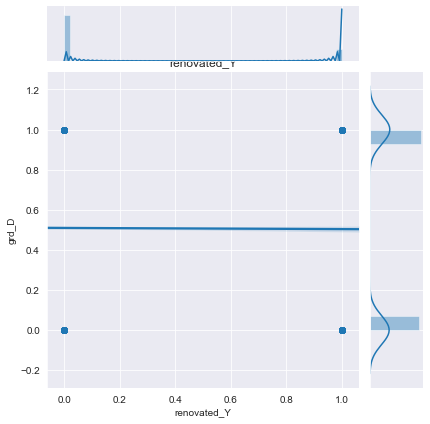

<Figure size 576x360 with 0 Axes>

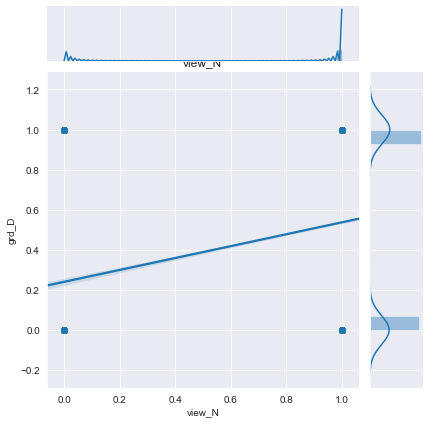

<Figure size 576x360 with 0 Axes>

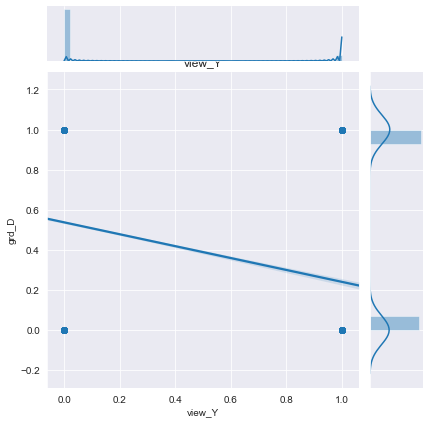

<Figure size 576x360 with 0 Axes>

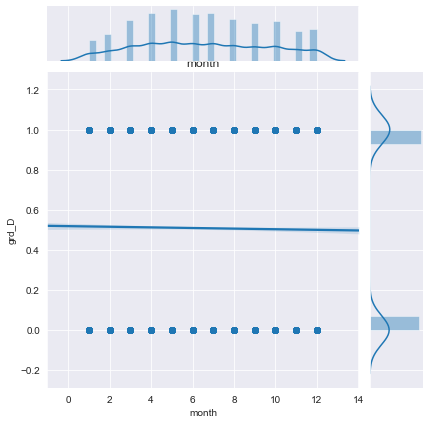

<Figure size 576x360 with 0 Axes>

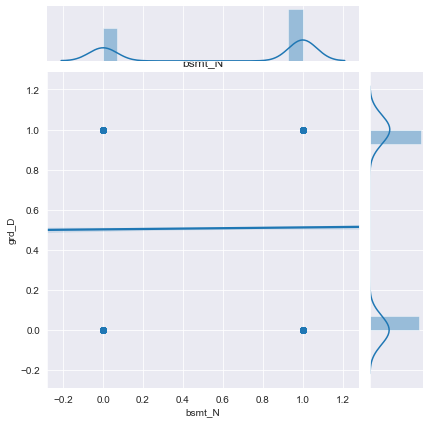

<Figure size 576x360 with 0 Axes>

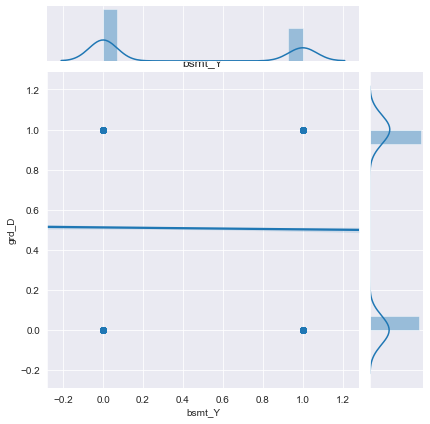

<Figure size 576x360 with 0 Axes>

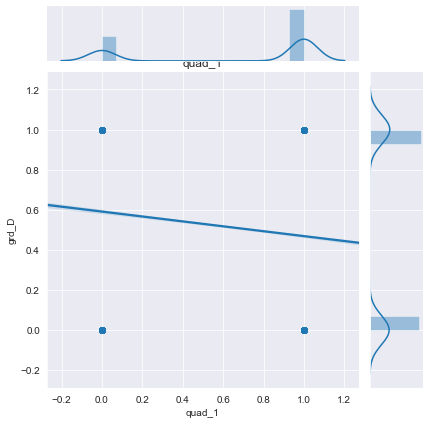

<Figure size 576x360 with 0 Axes>

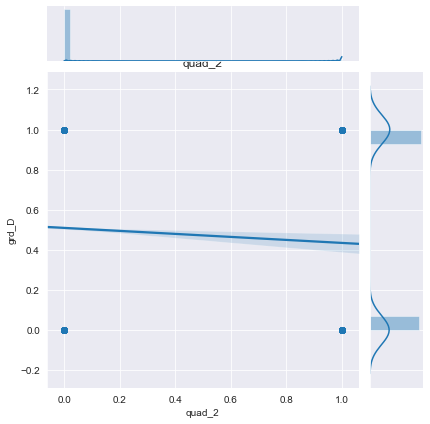

<Figure size 576x360 with 0 Axes>

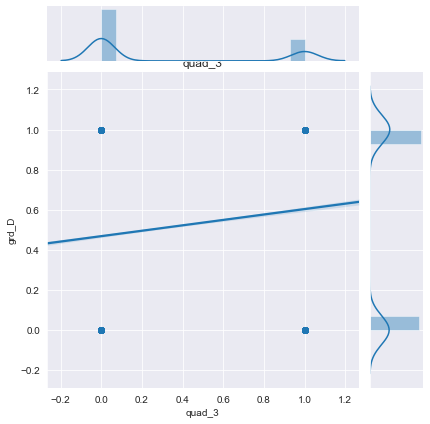

<Figure size 576x360 with 0 Axes>

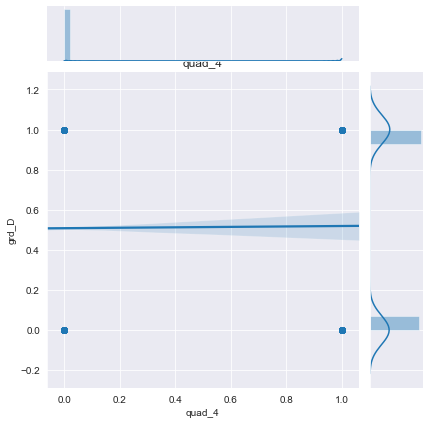

<Figure size 576x360 with 0 Axes>

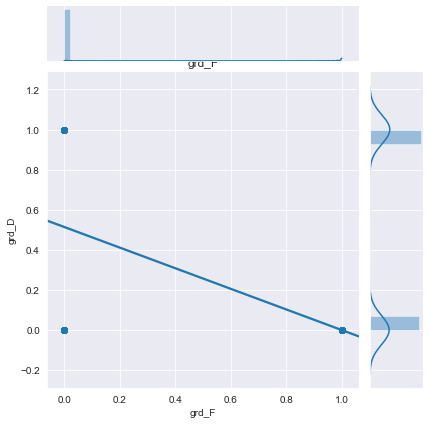

<Figure size 576x360 with 0 Axes>

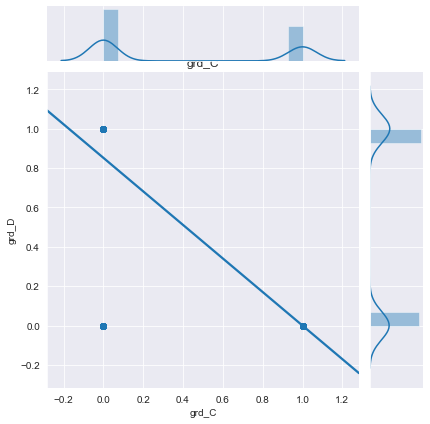

<Figure size 576x360 with 0 Axes>

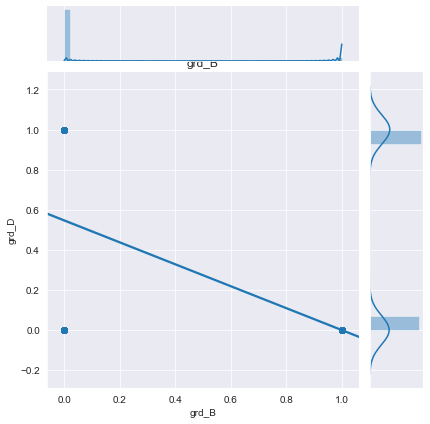

<Figure size 576x360 with 0 Axes>

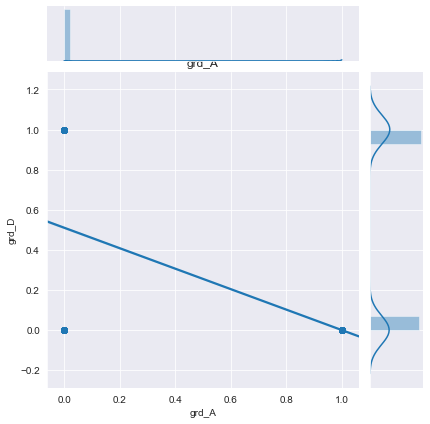

In [70]:
#according to heatmap, grd_D and quad_1 have high influence in a lot of areas.
no_d = adf1.drop(['id', 'price', 'grd_D'], axis=1)

for col in no_d.columns:
    plt.figure(figsize=(8,5))
    sns.jointplot(x= col, y= 'grd_D', data=adf1, kind='reg')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('grd_D')
    plt.show()

In [71]:
# Since one of the dummy vars needs to be dropped and grd_D influences the
# most features, we'll drop grd_D and quad_1 from now on

target = 'price'

feats = adf1.drop(['price', 'id', 'grd_D', 'quad_1'], axis=1).columns

preds = '+'.join(feats)

formula1 = target + '~' + preds
model1 = smf.ols(formula=formula1, data=adf1).fit()
model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS                  Adj. R-squared:         0.724      
Dependent Variable:     price                AIC:                    582231.8518
Date:                   2020-07-17 15:01     BIC:                    582431.1538
No. Observations:       21420                Log-Likelihood:         -2.9109e+05
Df Model:               24                   F-statistic:            2340.      
Df Residuals:           21395                Prob (F-statistic):     0.00       
R-squared:              0.724                Scale:                  3.7315e+10 
--------------------------------------------------------------------------------
                 Coef.       Std.Err.     t     P>|t|     [0.025       0.975]   
--------------------------------------------------------------------------------
Intercept     3891697.9794 785475.1183   4.9546 0.0000 2352107.9387 5431288.0201
bedrooms       -25077.7377   1862.1361 -13.4672 0.0000  -28727.6639  -21427.8115
bathrooms       44701.4857   3151.0748  14.1861 0.0000   38525.1433   50877.8282
sqft_living       169.9296      3.2821  51.7750 0.0000     163.4965     176.3627
sqft_lot            0.1588      0.0461   3.4489 0.0006       0.0686       0.2491
floors          17614.7396   3397.6617   5.1844 0.0000   10955.0682   24274.4109
waterfront    1523917.2118 261946.8298   5.8177 0.0000 1010481.8133 2037352.6104
view          1332388.2261 262021.5825   5.0850 0.0000  818806.3067 1845970.1455
condition       31117.9738   2244.7910  13.8623 0.0000   26718.0153   35517.9323
basement      1290893.2915 261998.7702   4.9271 0.0000  777356.0859 1804430.4971
yr_built        -1823.0284     67.7090 -26.9245 0.0000   -1955.7430   -1690.3137
renovated     1301905.7828 261805.8755   4.9728 0.0000  788746.6652 1815064.9004
zipcode          -544.8725     32.8138 -16.6050 0.0000    -609.1900    -480.5550
lat            170386.8971  18078.1990   9.4250 0.0000  134952.2737  205821.5206
long          -285498.6675  15009.7570 -19.0209 0.0000 -314918.9150 -256078.4200
sqft_living15      43.9232      3.2844  13.3732 0.0000      37.4855      50.3609
sqft_lot15         -0.2941      0.0705  -4.1700 0.0000      -0.4323      -0.1558
waterfront_N  2367780.7674 523616.6072   4.5220 0.0000 1341453.0139 3394108.5209
waterfront_Y  1523917.2120 261946.8299   5.8177 0.0000 1010481.8134 2037352.6106
renovated_N   2589792.1964 523672.6311   4.9454 0.0000 1563354.6319 3616229.7609
renovated_Y   1301905.7830 261805.8756   4.9728 0.0000  788746.6653 1815064.9006
view_N        2559309.7525 523461.3689   4.8892 0.0000 1533286.2777 3585333.2273
view_Y        1332388.2269 262021.5827   5.0850 0.0000  818806.3072 1845970.1467
month           -2888.0333    423.8552  -6.8137 0.0000   -3718.8212   -2057.2454
bsmt_N        2600804.6880 523479.7086   4.9683 0.0000 1574745.2659 3626864.1101
bsmt_Y        1290893.2914 261998.7702   4.9271 0.0000  777356.0858 1804430.4969
quad_2         -34020.2821  11075.3635  -3.0717 0.0021  -55728.8239  -12311.7404
quad_3        -176146.4690   5586.2076 -31.5324 0.0000 -187095.8543 -165197.0838
quad_4          11686.4690  15119.0506   0.7730 0.4396  -17948.0022   41320.9403
grd_F          -20583.2728  12356.8289  -1.6657 0.0958  -44803.5826    3637.0370
grd_C           57340.3361   3678.0587  15.5898 0.0000   50131.0656   64549.6065
grd_B          292598.4877   7656.1192  38.2176 0.0000  277591.9208  307605.0546
grd_A         1013828.7158  21750.1578  46.6125 0.0000  971196.7781 1056460.6535
--------------------------------------------------------------------------------
Omnibus:               16100.942       Durbin-Watson:          1.990            
Prob(Omnibus):         0.000           Jarque-Bera (JB):       1231313.693      
Skew:                  2.989           Prob(JB):               0.000            
Kurtosi

Dropping grd_D resulted in our dummy variables having less fluctuation.

#### Months

In [72]:
# Don't want 12 dummy variables for months. Binning according to 4 seasons
bins = [0, 3, 6, 9, 12]
b_mnth = pd.cut(adf1['month'], bins)
b_mnth = b_mnth.cat.as_ordered()
b_mnth.head()

0    (9, 12]
1    (9, 12]
2     (0, 3]
3    (9, 12]
4     (0, 3]
Name: month, dtype: category
Categories (4, interval[int64]): [(0, 3] < (3, 6] < (6, 9] < (9, 12]]

Text(0.5, 1.0, 'Month Bins')

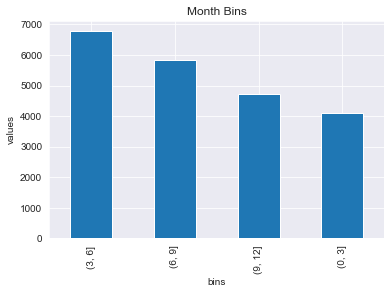

In [73]:
# Looks alright so far, lets plot and check see distribution
b_mnth.value_counts().plot(kind='bar')
plt.xlabel('bins')
plt.ylabel('values')
plt.title('Month Bins')


In [74]:
# Ok, as expected, between fall and spring you see a drop in sales. 
# Making dummies

adf1['month']= b_mnth
adf1['month'] = adf1['month'].cat.codes
mnth_dummies = pd.get_dummies(b_mnth, prefix='season')
adf1 = adf1.drop(['month'], axis=1)
adf1 = pd.concat([adf1, mnth_dummies], axis=1)
adf1.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,quad_4,grd_F,grd_D,grd_C,grd_B,grd_A,"season_(0, 3]","season_(3, 6]","season_(6, 9]","season_(9, 12]"
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0.0,0,1,0,0,0,0,0,0,1
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,0.0,0,1,0,0,0,0,0,0,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0.0,0,1,0,0,0,1,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,0.0,0,1,0,0,0,0,0,0,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0.0,0,0,1,0,0,1,0,0,0


In [75]:
# renaming columns for clarity

adf2 = adf1.rename(columns={'season_(0, 3]':'jan_mar', 
                            'season_(3, 6]':'apr_jun', 
                            'season_(6, 9]':'jul_sep', 
                            'season_(9, 12]':'oct_dec'})

In [86]:
#checking change and data types of new dummies

adf2.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'basement', 'yr_built',
       'renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'waterfront_N', 'waterfront_Y', 'renovated_N', 'renovated_Y', 'view_N',
       'view_Y', 'bsmt_N', 'bsmt_Y', 'quad_1', 'quad_2', 'quad_3', 'quad_4',
       'grd_F', 'grd_D', 'grd_C', 'grd_B', 'grd_A', 'jan_mar', 'apr_jun',
       'jul_sep', 'oct_dec'],
      dtype='object')

In [77]:
# converting dummy vars' data types
for col in adf2.columns:
    if adf2[col].dtype == adf2['oct_dec'].dtype:
        adf2[col] = adf2[col].astype(int)
adf2['jan_mar'].dtype

dtype('int32')

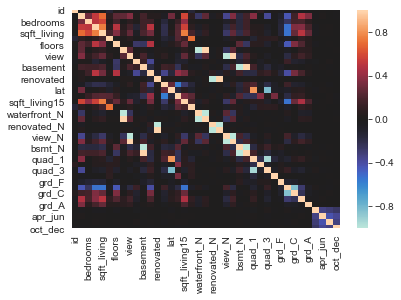

In [78]:
# checking heatmap for new correlations 
sns.heatmap(data=adf2.corr(), center=0)

In [79]:
# Looks safe, they only correlate to eachother, drop the first one: 'jan_mar'
target = 'price'

feats = adf2.drop(['price', 'id', 'grd_D', 'jan_mar'], axis=1).columns

preds = '+'.join(feats)

formula2 = target + '~' + preds
model2 = smf.ols(formula=formula2, data=adf2).fit()
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS                  Adj. R-squared:         0.724      
Dependent Variable:     price                AIC:                    582230.8431
Date:                   2020-07-17 15:03     BIC:                    582454.0613
No. Observations:       21420                Log-Likelihood:         -2.9109e+05
Df Model:               27                   F-statistic:            2080.      
Df Residuals:           21392                Prob (F-statistic):     0.00       
R-squared:              0.724                Scale:                  3.7308e+10 
--------------------------------------------------------------------------------
                 Coef.       Std.Err.     t     P>|t|     [0.025       0.975]   
--------------------------------------------------------------------------------
Intercept     3911876.2348 786038.3213   4.9767 0.0000 2371182.2618 5452570.2078
bedrooms       -25123.3018   1862.1405 -13.4916 0.0000  -28773.2367  -21473.3670
bathrooms       44694.3870   3151.0203  14.1841 0.0000   38518.1513   50870.6226
sqft_living       169.9926      3.2820  51.7951 0.0000     163.5596     176.4256
sqft_lot            0.1588      0.0461   3.4483 0.0006       0.0685       0.2491
floors          17559.6093   3397.5910   5.1683 0.0000   10900.0766   24219.1421
waterfront    1530504.6145 262133.8961   5.8386 0.0000 1016702.5481 2044306.6810
view          1339137.3877 262209.6452   5.1071 0.0000  825186.8473 1853087.9281
condition       31164.3668   2246.2431  13.8740 0.0000   26761.5621   35567.1715
basement      1297555.9687 262186.5688   4.9490 0.0000  783650.6598 1811461.2776
yr_built        -1821.4823     67.7062 -26.9027 0.0000   -1954.1916   -1688.7730
renovated     1308647.0725 261992.9128   4.9950 0.0000  795121.3438 1822172.8011
zipcode          -545.3914     32.8178 -16.6188 0.0000    -609.7168    -481.0660
lat            169626.5644  18084.0381   9.3799 0.0000  134180.4955  205072.6333
long          -285063.5976  15009.8349 -18.9918 0.0000 -314483.9979 -255643.1972
sqft_living15      43.9089      3.2846  13.3681 0.0000      37.4708      50.3469
sqft_lot15         -0.2960      0.0705  -4.1964 0.0000      -0.4342      -0.1577
waterfront_N  2381371.6196 523992.6729   4.5447 0.0000 1354306.7410 3408436.4982
waterfront_Y  1530504.6153 262133.8962   5.8386 0.0000 1016702.5485 2044306.6820
renovated_N   2603229.1623 524048.7951   4.9675 0.0000 1576054.2800 3630404.0445
renovated_Y   1308647.0725 261992.9128   4.9950 0.0000  795121.3439 1822172.8012
view_N        2572738.8479 523836.5041   4.9113 0.0000 1545980.0718 3599497.6240
view_Y        1339137.3869 262209.6450   5.1071 0.0000  825186.8468 1853087.9270
bsmt_N        2614320.2663 523855.1110   4.9905 0.0000 1587525.0193 3641115.5133
bsmt_Y        1297555.9685 262186.5687   4.9490 0.0000  783650.6597 1811461.2774
quad_1          55141.1944  96729.9566   0.5701 0.5686 -134456.7643  244739.1531
quad_2          20925.1493  97229.7639   0.2152 0.8296 -169652.4691  211502.7677
quad_3        -121244.8729  96710.7845  -1.2537 0.2100 -310805.2528   68315.5069
quad_4          66773.3957  97724.5242   0.6833 0.4944 -124773.9899  258320.7812
grd_F          -20436.5911  12361.7618  -1.6532 0.0983  -44666.5699    3793.3877
grd_C           57387.7594   3678.1111  15.6025 0.0000   50178.3862   64597.1326
grd_B          292288.3683   7656.2479  38.1765 0.0000  277281.5491  307295.1875
grd_A         1014459.4884  21748.1424  46.6458 0.0000  971831.5007 1057087.4761
apr_jun         -2347.8739   3832.0133  -0.6127 0.5401   -9858.9069    5163.1591
jul_sep        -20203.4316   3947.5008  -5.1180 0.0000  -27940.8289  -12466.0344
oct_dec        -21168.0539   4133.8412  -5.1207 0.0000  -29270.6921  -13065.4156
--------------------------------------------------------------------------------
Omnibus

#### Condition 

In [80]:
# Getting dummies for condition 
cond_dummies = pd.get_dummies(adf2['condition'], prefix='cond')

In [81]:
adf3 = pd.concat([adf2, cond_dummies], axis=1)

In [82]:
for col in adf3.columns:
    if adf3[col].dtype == adf3['cond_5'].dtype:
        adf3[col] = adf3[col].astype(int)
adf3['cond_4'].dtype

dtype('int32')

In [83]:
adf3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 44 columns):
id               21420 non-null int64
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       21420 non-null float64
view             21420 non-null float64
condition        21420 non-null int64
basement         21420 non-null float64
yr_built         21420 non-null int64
renovated        21420 non-null float64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
waterfront_N     21420 non-null int64
waterfront_Y     21420 non-null int64
renovated_N      21420 non-null int64
renovated_Y      21420 non-null int64
view_N           21420 non-null int64

In [84]:
adf3.to_csv('csv_files/kc_house_data_clean_with_dummies.csv')

In [85]:
target = 'price'

feats = adf3.drop(['price', 'id', 'grd_D', 'cond_1',
                   'condition', 'jan_mar', 'zipcode', 'quad_1'], axis=1).columns

preds = '+'.join(feats)

formula2 = target + '~' + preds
model2 = smf.ols(formula=formula2, data=adf3).fit()
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                   OLS                   Adj. R-squared:          0.720      
Dependent Variable:      price                 AIC:                     582506.0755
Date:                    2020-07-17 15:04      BIC:                     582737.2658
No. Observations:        21420                 Log-Likelihood:          -2.9122e+05
Df Model:                28                    F-statistic:             1971.      
Df Residuals:            21391                 Prob (F-statistic):      0.00       
R-squared:               0.721                 Scale:                   3.7788e+10 
-----------------------------------------------------------------------------------
                  Coef.       Std.Err.     t     P>|t|      [0.025        0.975]   
-----------------------------------------------------------------------------------
Intercept     -6145815.0687 504504.1610 -12.1819 0.0000 -7134681.0072 -5156949.1303
bedrooms        -23837.2598   1872.6964 -12.7288 0.0000   -27507.8850   -20166.6346
bathrooms        46107.3323   3176.3664  14.5157 0.0000    39881.4162    52333.2484
sqft_living        169.2391      3.3029  51.2392 0.0000      162.7651      175.7130
sqft_lot             0.1608      0.0464   3.4674 0.0005        0.0699        0.2517
floors           12333.8898   3413.4841   3.6133 0.0003     5643.2052    19024.5743
waterfront    -1822037.3732 168362.9659 -10.8221 0.0000 -2152041.3953 -1492033.3511
view          -2015514.1790 168324.2719 -11.9740 0.0000 -2345442.3578 -1685586.0001
basement      -2055899.6587 168376.9998 -12.2101 0.0000 -2385931.1883 -1725868.1292
yr_built         -1674.7054     68.1181 -24.5853 0.0000    -1808.2219    -1541.1888
renovated     -2043768.1510 168146.1208 -12.1547 0.0000 -2373347.1404 -1714189.1616
lat             107754.8354  17797.1477   6.0546 0.0000    72871.0931   142638.5777
long           -171365.6627  13439.9466 -12.7505 0.0000  -197708.9645  -145022.3608
sqft_living15       48.1124      3.2975  14.5905 0.0000       41.6490       54.5758
sqft_lot15          -0.3080      0.0710  -4.3384 0.0000       -0.4471       -0.1688
waterfront_N  -4323777.6959 336280.4157 -12.8577 0.0000 -4982912.4951 -3664642.8968
waterfront_Y  -1822037.3727 168362.9659 -10.8221 0.0000 -2152041.3948 -1492033.3507
renovated_N   -4102046.9176 336363.3871 -12.1953 0.0000 -4761344.3469 -3442749.4883
renovated_Y   -2043768.1511 168146.1208 -12.1547 0.0000 -2373347.1405 -1714189.1617
view_N        -4130300.8913 336192.2387 -12.2855 0.0000 -4789262.8569 -3471338.9257
view_Y        -2015514.1774 168324.2717 -11.9740 0.0000 -2345442.3560 -1685585.9987
bsmt_N        -4089915.4098 336132.3918 -12.1676 0.0000 -4748760.0711 -3431070.7486
bsmt_Y        -2055899.6589 168376.9998 -12.2101 0.0000 -2385931.1884 -1725868.1293
quad_2          -70001.2518  10932.5811  -6.4030 0.0000   -91429.9294   -48572.5741
quad_3         -186027.8304   5592.5436 -33.2635 0.0000  -196989.6346  -175066.0262
quad_4          -32351.8413  14979.1289  -2.1598 0.0308   -61712.0557    -2991.6269
grd_F           -18092.6942  12502.4758  -1.4471 0.1479   -42598.4831     6413.0948
grd_C            58280.0623   3701.8532  15.7435 0.0000    51024.1528    65535.9717
grd_B           291226.1548   7705.7801  37.7932 0.0000   276122.2488   306330.0609
grd_A          1017908.9512  21887.6635  46.5061 0.0000   975007.4916  1060810.4108
apr_jun          -3017.9231   3856.6554  -0.7825 0.4339   -10577.2566     4541.4103
jul_sep         -20259.9633   3973.0550  -5.0993 0.0000   -28047.4487   -12472.4780
oct_dec         -20845.1216   4160.8887  -5.0098 0.0000   -29000.7750   -12689.4682
cond_2           65185.1214  39908.6342   1.6334 0.1024   -13038.7904   143409.0332
cond_3           78981.9791  37056.3178   2.1314 0.0331     6348.8209   151615.1372
cond_4          115693.6999  

In [87]:
adf3.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'basement', 'yr_built',
       'renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'waterfront_N', 'waterfront_Y', 'renovated_N', 'renovated_Y', 'view_N',
       'view_Y', 'bsmt_N', 'bsmt_Y', 'quad_1', 'quad_2', 'quad_3', 'quad_4',
       'grd_F', 'grd_D', 'grd_C', 'grd_B', 'grd_A', 'jan_mar', 'apr_jun',
       'jul_sep', 'oct_dec', 'cond_1', 'cond_2', 'cond_3', 'cond_4', 'cond_5'],
      dtype='object')

In [88]:
cats = ['quad_1', 'quad_2', 'quad_3', 'quad_4', 'grd_F', 'grd_D', 'grd_C', 
        'grd_B', 'grd_A', 'jan_mar', 'apr_jun', 'jul_sep', 'oct_dec', 
        'cond_1', 'cond_2', 'cond_3', 'cond_4', 'cond_5']
for cat in cats:
    adf3[cat] = adf3[cat].astype('category')

# Outliers

In [89]:
continuous = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
         'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [90]:
outlier_df = adf3[continuous]
outlier_df.shape

(21420, 10)

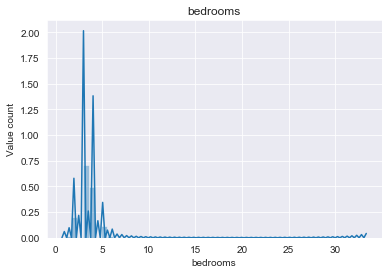

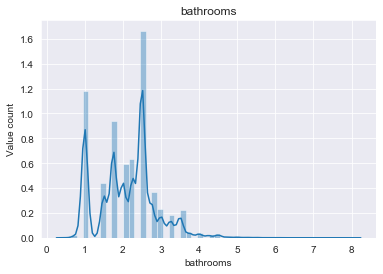

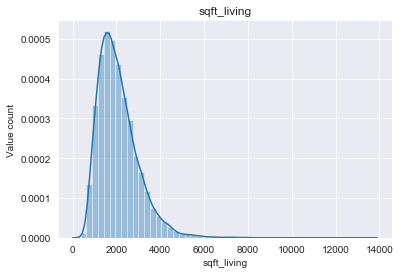

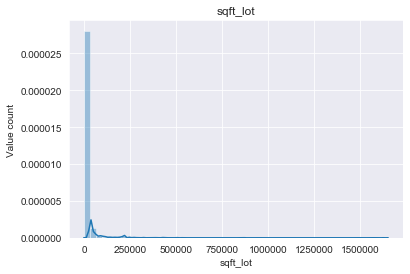

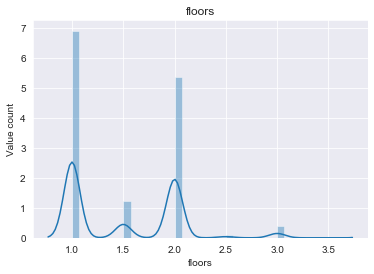

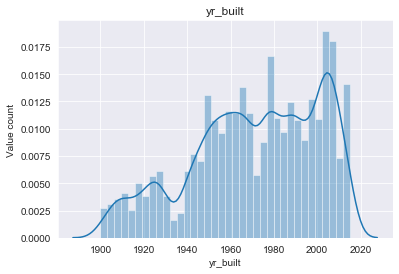

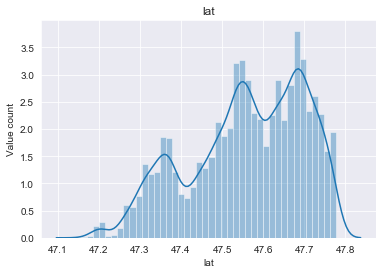

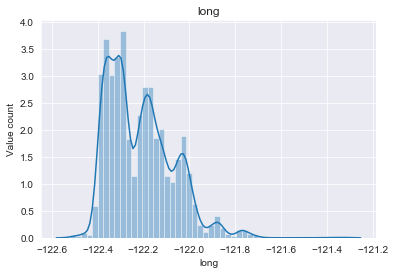

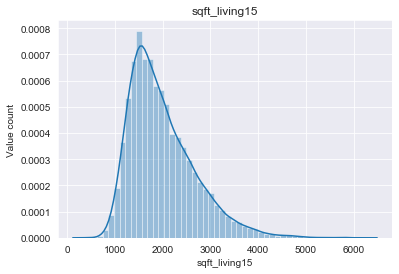

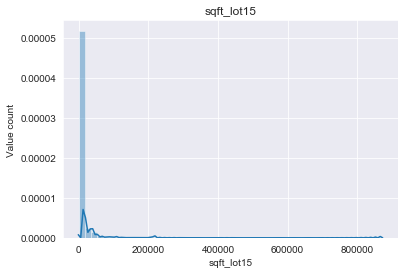

In [91]:
for col in outlier_df.columns: 
    sns.distplot(outlier_df[col], label=col, kde=True)
    plt.xlabel(col)
    plt.ylabel('Value count')
    plt.title(col)
    plt.show()

## Bedrooms
Dealing with outliers on case by case basis for each variable starting with bedrooms

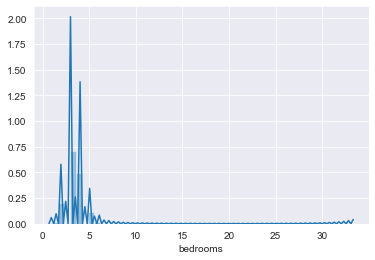

In [92]:
sns.distplot(adf3['bedrooms'], label=col, kde=True)

In [93]:
adf3.bedrooms.value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [94]:
# keeping 99% of the data should clear up the outliers 
adf4 = adf3.copy()
z = np.abs(stats.zscore(adf3.bedrooms))
threshold = 3
adf4 = adf4[(z < 3)]

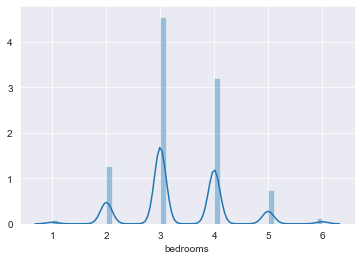

In [95]:
sns.distplot(adf4['bedrooms'], label=col, kde=True)

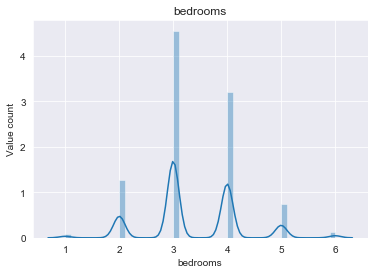

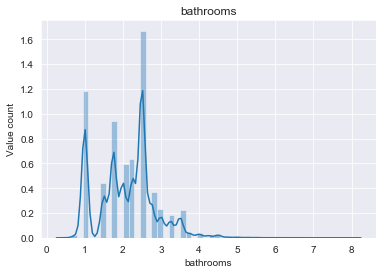

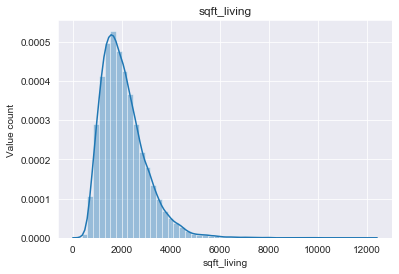

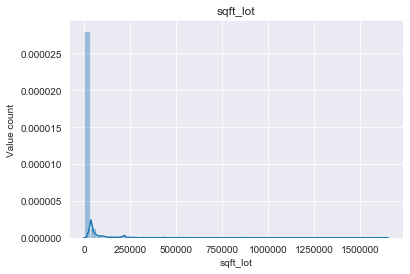

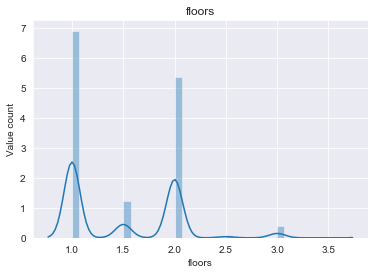

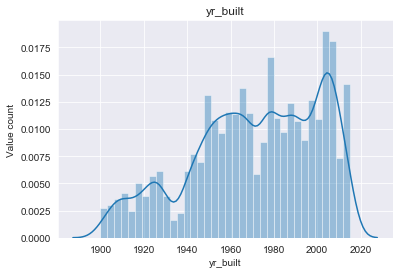

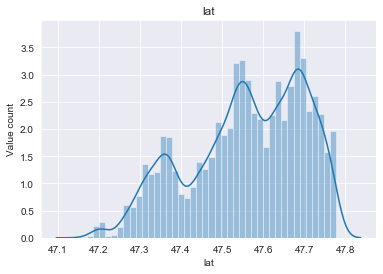

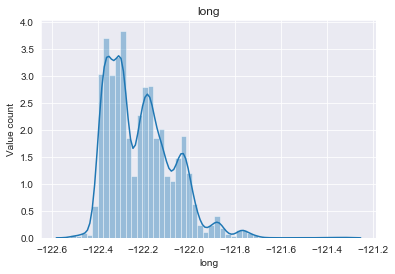

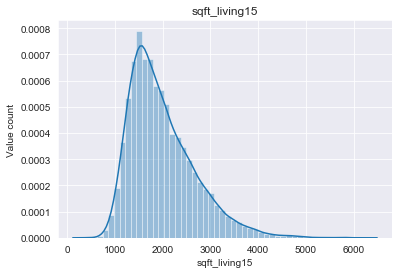

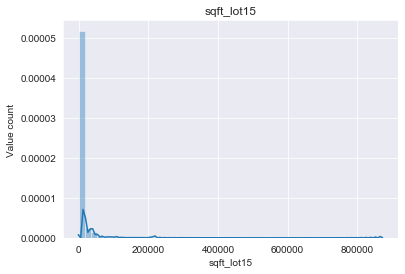

In [96]:
for col in adf4[continuous]: 
    sns.distplot(adf4[col], label=col, kde=True, norm_hist=True)
    plt.xlabel(col)
    plt.ylabel('Value count')
    plt.title(col)
    plt.show()

## Bathrooms

2.50    5349
1.00    3793
1.75    3019
2.25    2028
2.00    1912
1.50    1427
2.75    1176
3.00     738
3.50     723
3.25     584
3.75     152
4.00     126
4.50      94
4.25      77
0.75      70
4.75      21
5.00      20
5.25      12
5.50       9
1.25       9
6.00       5
0.50       4
5.75       3
6.25       2
6.50       2
8.00       1
7.75       1
6.75       1
Name: bathrooms, dtype: int64

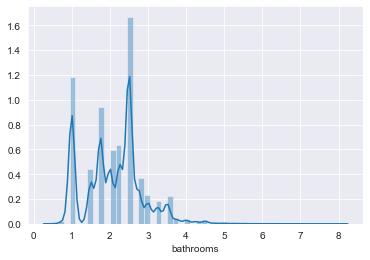

In [97]:
sns.distplot(adf4['bathrooms'], label=col, kde=True)
adf4.bathrooms.value_counts()

In [98]:
adf4 = adf4[adf4['bathrooms'] <= 4.00]

2.50    5349
1.00    3793
1.75    3019
2.25    2028
2.00    1912
1.50    1427
2.75    1176
3.00     738
3.50     723
3.25     584
3.75     152
4.00     126
0.75      70
1.25       9
0.50       4
Name: bathrooms, dtype: int64

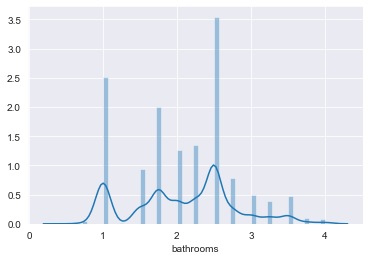

In [99]:
sns.distplot(adf4['bathrooms'], label=col, kde=True)
adf4.bathrooms.value_counts()

## Sqft_living

count    21110.000000
mean      2044.625817
std        847.613814
min        370.000000
25%       1420.000000
50%       1900.000000
75%       2520.000000
max       7850.000000
Name: sqft_living, dtype: float64

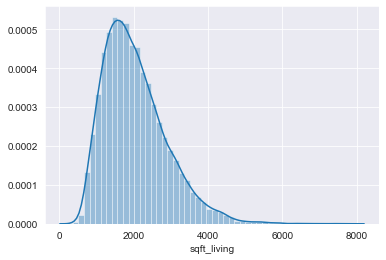

In [100]:
sns.distplot(adf4['sqft_living'], label=col, kde=True)
adf4.sqft_living.describe()

In [101]:
# We'll trim out houses bigger than 5000sqft
adf4 = adf4[adf4['sqft_living'] < 5000]

count    21007.000000
mean      2027.046365
std        810.415838
min        370.000000
25%       1420.000000
50%       1900.000000
75%       2510.000000
max       4980.000000
Name: sqft_living, dtype: float64

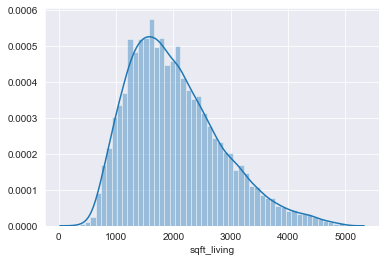

In [102]:
sns.distplot(adf4['sqft_living'], label=col, kde=True)
adf4.sqft_living.describe()

## Sqft_lot

array([ 5650,  7242, 10000, ...,  5813,  2388,  1076], dtype=int64)

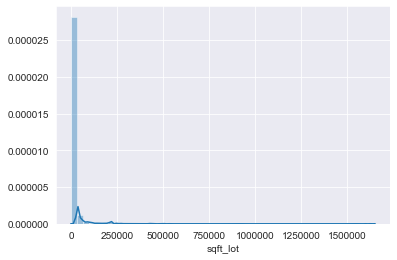

In [103]:
sns.distplot(adf4['sqft_lot'], label=col, kde=True)
adf4.sqft_lot.unique()

In [104]:
adf6 = adf4[adf4['sqft_lot'] < 35000]

count    19600.000000
mean      8111.634592
std       5150.160913
min        520.000000
25%       5000.000000
50%       7287.000000
75%       9720.000000
max      34991.000000
Name: sqft_lot, dtype: float64

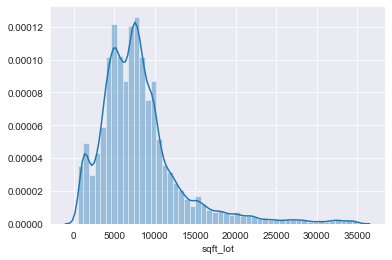

In [105]:
sns.distplot(adf6['sqft_lot'], label=col, kde=True)
adf6.sqft_lot.describe()

In [106]:
#I could trim more, but I risk losing even more data, leaving as is for now

## Sqft_lot15

count     19600.000000
mean       8039.274898
std        6853.523774
min         651.000000
25%        5000.000000
50%        7360.000000
75%        9476.000000
max      335289.000000
Name: sqft_lot15, dtype: float64

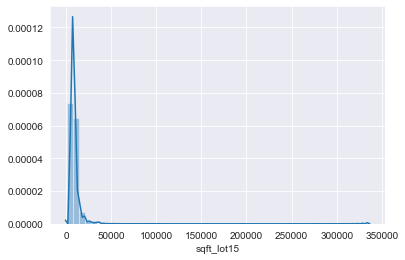

In [107]:
sns.distplot(adf6['sqft_lot15'], label=col, kde=True)
adf6.sqft_lot15.describe()

In [108]:
#trimming down to 50,000sqft
adf7 = adf6[adf6['sqft_lot15'] < 50000]

count    19562.000000
mean      7866.988345
std       4836.582155
min        651.000000
25%       5000.000000
50%       7350.000000
75%       9450.000000
max      49222.000000
Name: sqft_lot15, dtype: float64

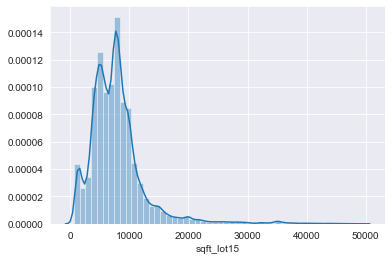

In [109]:
sns.distplot(adf7['sqft_lot15'], label=col, kde=True)
adf7.sqft_lot15.describe()

In [110]:
# bringing down a touch more to 30,000sqft
adf8 = adf6[adf6['sqft_lot15'] < 30000]

count    19391.000000
mean      7618.557527
std       4049.547255
min        651.000000
25%       5000.000000
50%       7334.000000
75%       9369.000000
max      29985.000000
Name: sqft_lot15, dtype: float64

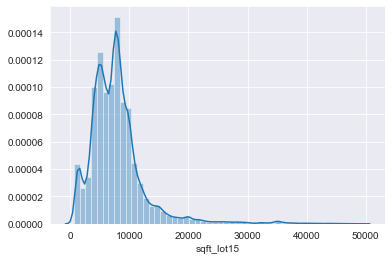

In [111]:
sns.distplot(adf7['sqft_lot15'], label=col, kde=True)
adf8.sqft_lot15.describe()

# Checking Effect

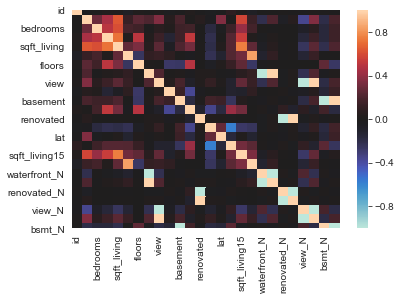

In [112]:
# Checking effect
sns.heatmap(adf8.corr(), center=0)

In [113]:

corr_pairs = adf8.corr().abs().stack().reset_index().sort_values(0, 
                                                                ascending=False)
corr_pairs['pairs'] = list(zip(corr_pairs.level_0, corr_pairs.level_1))

pairs_index = corr_pairs.set_index(['pairs'])

pairs = pairs_index.drop(columns=['level_0', 'level_1'])

pairs.columns = ['correlation']

unique_pairs = pairs.drop_duplicates()

In [114]:
unique_pairs[(unique_pairs.correlation>0.75) & (unique_pairs.correlation<1)]

,correlation
pairs,
"(sqft_lot15, sqft_lot)",0.848906
"(sqft_living15, sqft_living)",0.757752


In [115]:
test_frame = adf8.drop(['grd_D','apr_jun', 'condition', 'zipcode', 
                        'quad_3', 'cond_3', 'sqft_lot15','waterfront',
                        'waterfront_N','view','view_N','basement','bsmt_N',
                        'apr_jun'], axis=1)
test_frame.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'yr_built', 'renovated', 'lat', 'long', 'sqft_living15',
       'waterfront_Y', 'renovated_N', 'renovated_Y', 'view_Y', 'bsmt_Y',
       'quad_1', 'quad_2', 'quad_4', 'grd_F', 'grd_C', 'grd_B', 'grd_A',
       'jan_mar', 'jul_sep', 'oct_dec', 'cond_1', 'cond_2', 'cond_4',
       'cond_5'],
      dtype='object')

In [116]:
target = 'price'

feats = test_frame.drop(['id', 'price','renovated','renovated_N'], 
                        axis=1).columns
x_cols = adf8.drop(['price', 'id', 'grd_D','apr_jun', 'condition', 
                  'zipcode', 'quad_3', 'cond_3', 'sqft_lot15'], 
                 axis=1)
preds = '+'.join(feats)

formula2 = target + '~' + preds
model2 = smf.ols(formula=formula2, data=adf8).fit()
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                     OLS                    Adj. R-squared:           0.700      
Dependent Variable:        price                  AIC:                      521112.4934
Date:                      2020-07-17 15:12       BIC:                      521332.9252
No. Observations:          19391                  Log-Likelihood:           -2.6053e+05
Df Model:                  27                     F-statistic:              1680.      
Df Residuals:              19363                  Prob (F-statistic):       0.00       
R-squared:                 0.701                  Scale:                    2.7422e+10 
---------------------------------------------------------------------------------------
                  Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
---------------------------------------------------------------------------------------
Intercept     -18771816.5406 1696806.4522 -11.0630 0.0000 -22097703.9738 -15445929.1074
quad_1[T.1.0]    171809.0521    5058.6587  33.9634 0.0000    161893.6433    181724.4608
quad_2[T.1.0]     88176.2756   10862.5160   8.1175 0.0000     66884.8045    109467.7467
quad_4[T.1.0]    148533.8454   15160.9907   9.7971 0.0000    118816.9921    178250.6987
grd_F[T.1]       -38185.4636   11387.7853  -3.3532 0.0008    -60506.5079    -15864.4193
grd_C[T.1]        72220.0877    3332.4479  21.6718 0.0000     65688.2016     78751.9738
grd_B[T.1]       313639.0736    7322.7448  42.8308 0.0000    299285.8603    327992.2870
grd_A[T.1]       704205.1925   35457.2802  19.8607 0.0000    634705.8559    773704.5291
jan_mar[T.1]       6177.0887    3442.6260   1.7943 0.0728      -570.7560     12924.9334
jul_sep[T.1]     -16112.0015    3113.8657  -5.1743 0.0000    -22215.4475    -10008.5554
oct_dec[T.1]     -17550.3425    3311.6486  -5.2996 0.0000    -24041.4603    -11059.2246
cond_1[T.1]      -78044.0597   33389.7045  -2.3374 0.0194   -143490.7690    -12597.3504
cond_2[T.1]      -25263.9484   14572.6075  -1.7337 0.0830    -53827.5197      3299.6230
cond_4[T.1]       38392.2239    2998.8125  12.8025 0.0000     32514.2920     44270.1559
cond_5[T.1]       71557.3947    4739.2672  15.0988 0.0000     62268.0211     80846.7684
bedrooms         -18296.1195    1841.4461  -9.9357 0.0000    -21905.5131    -14686.7258
bathrooms         35767.9189    3005.5409  11.9007 0.0000     29876.7988     41659.0389
sqft_living         138.6337       3.3550  41.3215 0.0000       132.0577       145.2098
sqft_lot             -1.0732       0.3053  -3.5157 0.0004        -1.6715        -0.4749
floors            21518.0660    3233.3382   6.6551 0.0000     15180.4433     27855.6886
yr_built          -1728.6329      60.8478 -28.4091 0.0000     -1847.8998     -1609.3661
lat              147081.7690   16056.6945   9.1602 0.0000    115609.2587    178554.2793
long            -123194.3236   12506.7294  -9.8502 0.0000   -147708.5952    -98680.0520
sqft_living15        73.3255       3.2047  22.8806 0.0000        67.0440        79.6070
waterfront_Y     563681.3689   17973.3567  31.3621 0.0000    528452.0349    598910.7029
renovated_Y       17753.2349    2943.1406   6.0321 0.0000     11984.4247     23522.0452
view_Y            94973.1529    4639.2831  20.4715 0.0000     85879.7566    104066.5492
bsmt_Y           -12252.0781    3016.3897  -4.0618 0.0000    -18164.4628     -6339.6934
---------------------------------------------------------------------------------------
Omnibus:                   10415.787            Durbin-Watson:               1.993     
Prob(Omnibus):             0.000                Jarque-Bera (JB):            178990.935
Skew:                      2.200                Prob(JB):                    0.000     
Kurtosis:                  17.219               Condition No.:               13886083  
===================

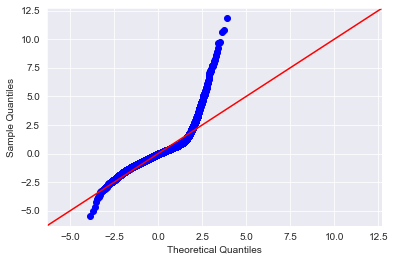

In [117]:
fig = sm.graphics.qqplot(model2.resid, dist='norm', line='45', fit=True)

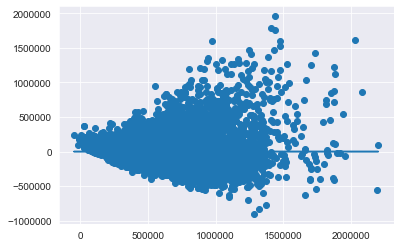

In [118]:
plt.scatter(model2.predict(x_cols), model2.resid)
plt.plot(model2.predict(x_cols), [0 for i in range(len(test_frame))])

In [119]:
test_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19391 entries, 0 to 21419
Data columns (total 31 columns):
id               19391 non-null int64
price            19391 non-null float64
bedrooms         19391 non-null int64
bathrooms        19391 non-null float64
sqft_living      19391 non-null int64
sqft_lot         19391 non-null int64
floors           19391 non-null float64
yr_built         19391 non-null int64
renovated        19391 non-null float64
lat              19391 non-null float64
long             19391 non-null float64
sqft_living15    19391 non-null int64
waterfront_Y     19391 non-null int64
renovated_N      19391 non-null int64
renovated_Y      19391 non-null int64
view_Y           19391 non-null int64
bsmt_Y           19391 non-null int64
quad_1           19391 non-null category
quad_2           19391 non-null category
quad_4           19391 non-null category
grd_F            19391 non-null category
grd_C            19391 non-null category
grd_B            19391 non-n

## Log

In [120]:
log_stuff = ['sqft_living', 'sqft_lot', 'sqft_living15']

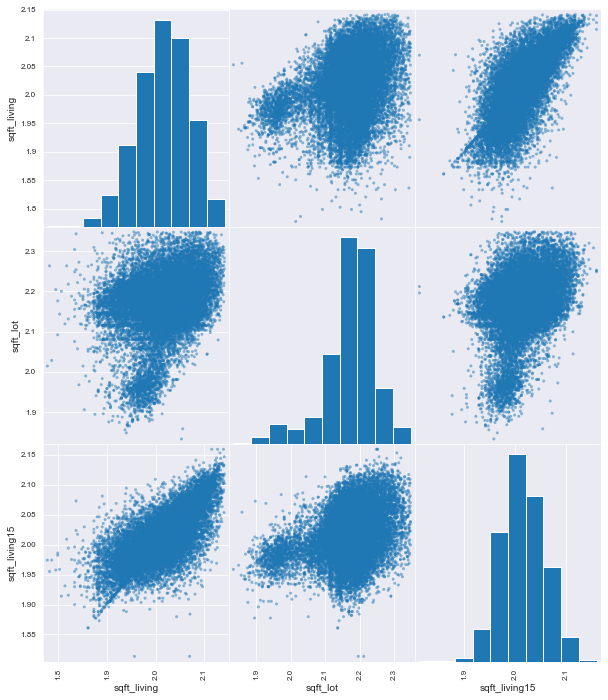

In [124]:
for log in log_stuff:
    test_frame[log] = test_frame[log].map(lambda x : np.log(x))
    test_frame[log] = test_frame[log].rename({log : 'log_'+log})
pd.plotting.scatter_matrix(test_frame[log_stuff], figsize=(10,12));


In [125]:
test_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19391 entries, 0 to 21419
Data columns (total 31 columns):
id               19391 non-null int64
price            19391 non-null float64
bedrooms         19391 non-null int64
bathrooms        19391 non-null float64
sqft_living      19391 non-null float64
sqft_lot         19391 non-null float64
floors           19391 non-null float64
yr_built         19391 non-null int64
renovated        19391 non-null float64
lat              19391 non-null float64
long             19391 non-null float64
sqft_living15    19391 non-null float64
waterfront_Y     19391 non-null int64
renovated_N      19391 non-null int64
renovated_Y      19391 non-null int64
view_Y           19391 non-null int64
bsmt_Y           19391 non-null int64
quad_1           19391 non-null category
quad_2           19391 non-null category
quad_4           19391 non-null category
grd_F            19391 non-null category
grd_C            19391 non-null category
grd_B            19391

In [126]:
target = 'price'

feats = test_frame.drop(['id', 'price','renovated','renovated_N'], 
                        axis=1).columns
x_cols = adf8.drop(['price', 'id', 'grd_D','apr_jun', 'condition', 
                  'zipcode', 'quad_3', 'cond_3', 'sqft_lot15'], 
                 axis=1)
preds = '+'.join(feats)

formula2 = target + '~' + preds
model2 = smf.ols(formula=formula2, data=adf8).fit()
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                     OLS                    Adj. R-squared:           0.700      
Dependent Variable:        price                  AIC:                      521112.4934
Date:                      2020-07-17 15:25       BIC:                      521332.9252
No. Observations:          19391                  Log-Likelihood:           -2.6053e+05
Df Model:                  27                     F-statistic:              1680.      
Df Residuals:              19363                  Prob (F-statistic):       0.00       
R-squared:                 0.701                  Scale:                    2.7422e+10 
---------------------------------------------------------------------------------------
                  Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
---------------------------------------------------------------------------------------
Intercept     -18771816.5406 1696806.4522 -11.0630 0.0000 -22097703.9738 -15445929.1074
quad_1[T.1.0]    171809.0521    5058.6587  33.9634 0.0000    161893.6433    181724.4608
quad_2[T.1.0]     88176.2756   10862.5160   8.1175 0.0000     66884.8045    109467.7467
quad_4[T.1.0]    148533.8454   15160.9907   9.7971 0.0000    118816.9921    178250.6987
grd_F[T.1]       -38185.4636   11387.7853  -3.3532 0.0008    -60506.5079    -15864.4193
grd_C[T.1]        72220.0877    3332.4479  21.6718 0.0000     65688.2016     78751.9738
grd_B[T.1]       313639.0736    7322.7448  42.8308 0.0000    299285.8603    327992.2870
grd_A[T.1]       704205.1925   35457.2802  19.8607 0.0000    634705.8559    773704.5291
jan_mar[T.1]       6177.0887    3442.6260   1.7943 0.0728      -570.7560     12924.9334
jul_sep[T.1]     -16112.0015    3113.8657  -5.1743 0.0000    -22215.4475    -10008.5554
oct_dec[T.1]     -17550.3425    3311.6486  -5.2996 0.0000    -24041.4603    -11059.2246
cond_1[T.1]      -78044.0597   33389.7045  -2.3374 0.0194   -143490.7690    -12597.3504
cond_2[T.1]      -25263.9484   14572.6075  -1.7337 0.0830    -53827.5197      3299.6230
cond_4[T.1]       38392.2239    2998.8125  12.8025 0.0000     32514.2920     44270.1559
cond_5[T.1]       71557.3947    4739.2672  15.0988 0.0000     62268.0211     80846.7684
bedrooms         -18296.1195    1841.4461  -9.9357 0.0000    -21905.5131    -14686.7258
bathrooms         35767.9189    3005.5409  11.9007 0.0000     29876.7988     41659.0389
sqft_living         138.6337       3.3550  41.3215 0.0000       132.0577       145.2098
sqft_lot             -1.0732       0.3053  -3.5157 0.0004        -1.6715        -0.4749
floors            21518.0660    3233.3382   6.6551 0.0000     15180.4433     27855.6886
yr_built          -1728.6329      60.8478 -28.4091 0.0000     -1847.8998     -1609.3661
lat              147081.7690   16056.6945   9.1602 0.0000    115609.2587    178554.2793
long            -123194.3236   12506.7294  -9.8502 0.0000   -147708.5952    -98680.0520
sqft_living15        73.3255       3.2047  22.8806 0.0000        67.0440        79.6070
waterfront_Y     563681.3689   17973.3567  31.3621 0.0000    528452.0349    598910.7029
renovated_Y       17753.2349    2943.1406   6.0321 0.0000     11984.4247     23522.0452
view_Y            94973.1529    4639.2831  20.4715 0.0000     85879.7566    104066.5492
bsmt_Y           -12252.0781    3016.3897  -4.0618 0.0000    -18164.4628     -6339.6934
---------------------------------------------------------------------------------------
Omnibus:                   10415.787            Durbin-Watson:               1.993     
Prob(Omnibus):             0.000                Jarque-Bera (JB):            178990.935
Skew:                      2.200                Prob(JB):                    0.000     
Kurtosis:                  17.219               Condition No.:               13886083  
===================

## Try Changing Continuous Variables into Categorical Dummies

In [ ]:
# turning 'bedrooms' into categorical
adf8.info()

In [ ]:
X = test_frame.drop(['id', 'price','renovated','renovated_N'], 
                        axis=1)

In [ ]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [ ]:
result = stepwise_selection(X, test_frame['price'], verbose=True)
print('resulting features:')
print(result)

In [ ]:
test2= test_frame[['price', 'view_Y', 'bathrooms', 'yr_built', 'sqft_living15', 
                    'quad_1', 'sqft_living', 'grd_B', 'waterfront_Y', 'grd_C', 
                    'grd_A', 'lat', 'cond_5', 'bedrooms', 'cond_4', 'floors', 
                    'quad_4', 'long', 'quad_2', 'renovated_Y', 'grd_F', 
                    'bsmt_Y', 'sqft_lot', 'oct_dec', 'jul_sep']]

In [ ]:
target = 'price'

feats = test2.drop(['price'], axis=1).columns
x_cols = test2.drop(['price'], axis=1)
preds = '+'.join(feats)

formula2 = target + '~' + preds
model2 = smf.ols(formula=formula2, data=test2).fit()
model2.summary2()

In [ ]:
# using IQR to remove outliers
# making copy of data frame
ndf = adf3.copy()

In [ ]:
ndf.head()

In [ ]:
ndf.shape

In [ ]:
# List of continuous data that.  Excluding 'lat' and 'long'. 
conts = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
         'sqft_living15', 'sqft_lot15']
continuous = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
         'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15'] 

In [ ]:
# creating a for loop that defines the IQR and Whiskers so we can remove all 
# data outside of the whiskers (outliers)
for cont in continuous:
    q1 = ndf[cont].quantile(0.25)
    q3= ndf[cont].quantile(0.75)
    IQR = q3 - q1
    Lower_Whisker = q1 - 1.5*IQR
    Upper_Whisker = q3 + 1.5*IQR
    ndf = ndf[ndf[cont] <= Upper_Whisker]
ndf.describe()

In [ ]:
ndf[conts].hist(figsize=(10,10));

In [ ]:
ndf.shape

Plots are looking much better, but at the cost of data.

In [ ]:
target = 'price'

feats = ndf.drop(['price', 'id', 'grd_D', 'jan_mar', 'condition', 
                  'zipcode', 'quad_1', 'cond_1'], axis=1).columns

preds = '+'.join(feats)

formula2 = target + '~' + preds
model2 = smf.ols(formula=formula2, data=ndf).fit()
model2.summary2()

R2 has dropped, but skew and kurtosis have decreased substantially. Standard errors have decreased, as well. Checking for correlation. 

In [ ]:
sns.heatmap(ndf.corr(), center=0)

In [ ]:
# creating a date frame that only contains the pairs of values with highest 
# correlation

# converts all elements to absolute values, stacks into multi-index, resets 
# the index to set the multi-index to seperate columns, and finally sorts them
corr_pairs = ndf.corr().abs().stack().reset_index().sort_values(0, 
                                                                ascending=False)
# zipping the variable name columns
corr_pairs['pairs'] = list(zip(corr_pairs.level_0, corr_pairs.level_1))

#set index to the pairs
pairs_index = corr_pairs.set_index(['pairs'])

#dropping level columns
pairs = pairs_index.drop(columns=['level_0', 'level_1'])

#renaming column for comprehension
pairs.columns = ['correlation']
#Since our heatmap shows that our variables only show perfect correlation with 
#themselves, we'll drop duplicates
unique_pairs = pairs.drop_duplicates()

In [ ]:
unique_pairs[(unique_pairs.correlation>0.75) & (unique_pairs.correlation<1)]

In [ ]:
# Drop grd_D, cond_3, quad_3, sqft_lot15 (statistically insignificant)
target = 'price'

feats = ndf.drop(['price', 'id', 'grd_D', 'jan_mar', 'condition', 
                  'zipcode', 'quad_3', 'cond_3', 'sqft_lot15'], 
                 axis=1).columns

preds = '+'.join(feats)

formula2 = target + '~' + preds
model2 = smf.ols(formula=formula2, data=ndf).fit()
model2.summary2()

In [ ]:
target = 'price'

feats = ndf.drop(['price', 'id', 'grd_D','apr_jun', 'condition', 
                  'zipcode', 'quad_3', 'cond_3', 'sqft_lot15'], 
                 axis=1).columns
x_cols = ndf.drop(['price', 'id', 'grd_D','apr_jun', 'condition', 
                  'zipcode', 'quad_3', 'cond_3', 'sqft_lot15'], 
                 axis=1)
preds = '+'.join(feats)

formula2 = target + '~' + preds
model2 = smf.ols(formula=formula2, data=adf4).fit()
model2.summary2()

In [ ]:
fig = sm.graphics.qqplot(model2.resid, dist='norm', line='45', fit=True)

In [ ]:
plt.scatter(model2.predict(x_cols), model2.resid)
plt.plot(model2.predict(x_cols), [0 for i in range(len(ndf))])

In [ ]:
for cont in conts:
    ndf[cont] = ndf[cont].map(lambda x : np.log(x))
pd.plotting.scatter_matrix(ndf[conts], figsize=(10,12));